# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [114]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sklearn
import psycopg2 as psy

#### Step 2: Examine your data 

In [3]:
airport_cancel_divert = pd.read_csv("../assets/airport_cancellations.csv")

In [4]:
len(airport_cancel_divert["Airport"].unique())

74

In [5]:
len(airport_cancel_divert)

805

In [6]:
len(airport_cancel_divert["Year"].unique())

11

In [7]:
airport_cancel_divert.isnull().sum()

Airport                    0
Year                       0
Departure Cancellations    0
Arrival Cancellations      0
Departure Diversions       0
Arrival Diversions         0
dtype: int64

In [8]:
airport_cancel_divert["Airport"].value_counts()

#OXR and RFD missing

LAS    11
MHT    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
BUR    11
SWF    11
SJC    11
TUS    11
MKE    11
SMF    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
CLE    11
LGA    11
SNA    11
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
DFW    11
IAD    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
OXR     7
RFD     6
Name: Airport, dtype: int64

In [9]:
#Missing 2011 - 2014

airport_cancel_divert[airport_cancel_divert["Airport"] == "OXR"]

Airport    Year  Departure Cancellations  Arrival Cancellations  \
539     OXR  2004.0                     43.0                   37.0   
540     OXR  2005.0                     33.0                   22.0   
541     OXR  2006.0                     51.0                   44.0   
542     OXR  2007.0                     21.0                   17.0   
543     OXR  2008.0                     20.0                   20.0   
544     OXR  2009.0                     27.0                   24.0   
545     OXR  2010.0                     10.0                    8.0   

     Departure Diversions  Arrival Diversions  
539                   0.0                 0.0  
540                   0.0                 0.0  
541                   2.0                 1.0  
542                   1.0                 0.0  
543                   1.0                 0.0  
544                   0.0                 0.0  
545                   0.0                 0.0

In [10]:
#Missing 2004

airport_cancel_divert[airport_cancel_divert["Airport"] == "RFD"]

Airport    Year  Departure Cancellations  Arrival Cancellations  \
634     RFD  2006.0                      9.0                   11.0   
635     RFD  2007.0                      4.0                    7.0   
636     RFD  2008.0                      5.0                    2.0   
637     RFD  2011.0                      0.0                    0.0   
638     RFD  2012.0                      1.0                    1.0   
639     RFD  2013.0                      0.0                    0.0   

     Departure Diversions  Arrival Diversions  
634                   2.0                 8.0  
635                   2.0                11.0  
636                   0.0                 5.0  
637                   0.0                 0.0  
638                   0.0                 0.0  
639                   0.0                 0.0

In [11]:
#airport_cancel_divert sums up each airports year from 2004 - 2014 to sum up all the cancellations and diversions happening 

#OXR and RFD are missing values though 

In [12]:
airport_cancel_details = pd.read_csv("../assets/Airport_operations.csv")

In [57]:
airport_cancel_details["airport"].value_counts()

LAS    11
BUR    11
VNY    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
GYY    11
SAT    11
RDU    11
MEM    11
ISP    11
TEB    11
MHT    11
SJC    11
SWF    11
MKE    11
ONT    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
BDL    11
DFW    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

In [13]:
len(airport_cancel_details["airport"].unique())

#includes 3 more airports than the airport_cancel_divert data set

77

In [14]:
#missing 2004 - 2006
airport_cancel_details[airport_cancel_details["airport"] == "PSP"]

airport  year  departures for metric computation  \
616     PSP  2007                              17764   
617     PSP  2008                              16005   
618     PSP  2009                              14802   
619     PSP  2010                              14769   
620     PSP  2011                              14458   
621     PSP  2012                              15601   
622     PSP  2013                              15346   
623     PSP  2014                              16231   

     arrivals for metric computation  percent on-time gate departures  \
616                            17852                           0.7411   
617                            16036                           0.7683   
618                            14837                           0.8128   
619                            14859                           0.7944   
620                            14632                           0.7738   
621                            15682                           0.7692   
622                            15242                           0.7754   
623                            16208                           0.7632   

     percent on-time airport departures  percent on-time gate arrivals  \
616                              0.7053                         0.7011   
617                              0.7321                         0.7312   
618                              0.7919                         0.7853   
619                              0.7699                         0.7574   
620                              0.7484                         0.7484   
621                              0.7362                         0.7587   
622                              0.7483                         0.7683   
623                              0.7332                         0.7512   

     average_gate_departure_delay  average_taxi_out_time  \
616                         13.53                  11.40   
617                         12.35                  12.16   
618                         10.22                  11.90   
619                         11.54                  11.77   
620                         12.76                  11.89   
621                         14.00                  12.51   
622                         14.15                  12.50   
623                         14.56                  12.67   

     average taxi out delay  average airport departure delay  \
616                    3.03                            15.56   
617                    3.10                            14.32   
618                    2.32                            11.52   
619                    2.50                            12.97   
620                    2.64                            14.33   
621                    3.14                            15.98   
622                    2.72                            15.76   
623                    2.74                            16.29   

     average airborne delay  average taxi in delay  average block delay  \
616                    2.48                   1.00                 3.52   
617                    2.82                   1.17                 3.71   
618                    2.67                   0.68                 2.88   
619                    3.07                   0.73                 3.12   
620                    3.35                   0.77                 3.30   
621                    3.23                   0.84                 3.20   
622                    2.89                   0.95                 2.91   
623                    3.19                   0.99                 3.78   

     average gate arrival delay  
616                       15.67  
617                       13.87  
618                       10.95  
619                       12.86  
620                       13.57  
621                       12.85  
622                       12.66  
623                       13.81

In [15]:
#missing 2004 - 2006
airport_cancel_details[airport_cancel_details["airport"] == "SMF"]

airport  year  departures for metric computation  \
756     SMF  2007                              65686   
757     SMF  2008                              61470   
758     SMF  2009                              52731   
759     SMF  2010                              51516   
760     SMF  2011                              50574   
761     SMF  2012                              49016   
762     SMF  2013                              46868   
763     SMF  2014                              47618   

     arrivals for metric computation  percent on-time gate departures  \
756                            65960                           0.8025   
757                            61500                           0.8067   
758                            52905                           0.8401   
759                            51632                           0.8209   
760                            50719                           0.8265   
761                            49085                           0.8505   
762                            47183                           0.8242   
763                            47523                           0.7861   

     percent on-time airport departures  percent on-time gate arrivals  \
756                              0.7690                         0.7724   
757                              0.7884                         0.7706   
758                              0.8281                         0.8066   
759                              0.8073                         0.7886   
760                              0.7981                         0.8055   
761                              0.8285                         0.8311   
762                              0.7999                         0.8035   
763                              0.7661                         0.7659   

     average_gate_departure_delay  average_taxi_out_time  \
756                         11.01                  10.86   
757                         11.12                  10.46   
758                          9.02                   9.85   
759                          9.97                   9.64   
760                          9.82                  10.32   
761                          8.97                  10.43   
762                          9.88                  10.58   
763                         11.91                  10.75   

     average taxi out delay  average airport departure delay  \
756                    2.64                            12.95   
757                    1.93                            12.29   
758                    1.57                             9.75   
759                    1.48                            10.86   
760                    2.19                            11.36   
761                    2.20                            10.40   
762                    2.13                            11.29   
763                    2.04                            13.09   

     average airborne delay  average taxi in delay  average block delay  \
756                    2.54                   1.12                 2.59   
757                    2.13                   0.73                 2.49   
758                    1.88                   0.65                 1.75   
759                    1.93                   0.66                 1.98   
760                    1.86                   0.83                 2.01   
761                    1.71                   1.01                 1.69   
762                    1.87                   0.74                 1.64   
763                    2.00                   0.85                 2.10   

     average gate arrival delay  
756                       12.17  
757                       12.13  
758                        9.87  
759                       11.10  
760                       10.41  
761                        9.28  
762                       10.47  
763                       12.57

In [16]:
#GYY, TEB, VNY are in here but not the first one

airport_cancel_details["airport"].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'GYY', 'HNL', 'HOU', 'HPN', 'IAD',
       'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
       'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY',
       'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL',
       'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT',
       'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL',
       'SWF', 'TEB', 'TPA', 'TUS', 'VNY'], dtype=object)

In [17]:
airport_cancel_divert["Airport"].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

In [18]:
airport_details = pd.read_csv("../assets/airports.csv")

In [19]:
airport_details.head()

Key LocID                   AP_NAME  \
0  3443.0   STX           HENRY E ROHLSEN   
1  5088.0   X64                  PATILLAS   
2  2886.0   PSE                 MERCEDITA   
3  2879.0   VQS  ANTONIO RIVERA RODRIGUEZ   
4  2883.0   X63                   HUMACAO   

                                 ALIAS Facility Type FAA REGION  \
0        Henry E Rohlsen Int'l Airport       Airport        ASO   
1                                  NaN       Airport        ASO   
2                 Aeropuerto Mercedita       Airport        ASO   
3  Aeropuerto Antonio Rivera Rodr�guez       Airport        ASO   
4       Aeropuerto Regional De Humacao       Airport        ASO   

             COUNTY             CITY STATE     AP Type   Latitude  Longitude  \
0  -VIRGIN ISLANDS-    CHRISTIANSTED    VI  Public Use  17.701556 -64.801722   
1            #NAME?         PATILLAS    PR  Public Use  17.982189 -66.019330   
2            #NAME?            PONCE    PR  Public Use  18.008306 -66.563028   
3            #NAME?  ISLA DE VIEQUES    PR  Public Use  18.134811 -65.493617   
4            #NAME?          HUMACAO    PR  Public Use  18.138017 -65.800718   

  Boundary Data Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                     Yes

In [20]:
len(airport_details["LocID"].unique())

5153

In [21]:
airport_details[airport_details["LocID"] == "SEA"]

Key LocID              AP_NAME                         ALIAS  \
4532  3520.0   SEA  SEATTLE-TACOMA INTL  Seattle-Tacoma Int'l Airport   

     Facility Type FAA REGION COUNTY     CITY STATE                 AP Type  \
4532       Airport        ANM   KING  SEATTLE    WA  Federalized/Commercial   

       Latitude   Longitude Boundary Data Available  
4532  47.449889 -122.311778                     Yes

In [22]:
#airport_details has way more details than the the airports that are listed in the other tables

### Intro: Write a problem statement / aim for this project

Identify what is causing delays at certain airports, and why

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [25]:

from sqlalchemy import create_engine

engine = create_engine('postgresql://@localhost:5432/airports')

airport_details.to_sql("airport_details", engine)

In [24]:
%load_ext sql

/Users/katty/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/katty/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [26]:
%%sql 
postgresql://@localhost:5432/airports

u'Connected: @airports'

In [27]:
%%sql 
SELECT
  *
FROM
  INFORMATION_SCHEMA.TABLES;

174 rows affected.


[(u'airports', u'public', u'airport_details', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statistic', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_type', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_authid', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_roles', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_shadow', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_group', u'VIEW', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_user', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_policies', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_settings', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_rules', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_file_settings', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_views', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_matviews', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_indexes', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stats', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_locks', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_cursors', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_available_extensions', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_available_extension_versions', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_prepared_xacts', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_prepared_statements', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_seclabels', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_timezone_abbrevs', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_timezone_names', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_xact_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_sys_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_xact_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_sys_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_all_indexes', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_sys_indexes', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog'

In [28]:
%%sql 
SELECT * FROM airport_details limit 5;

5 rows affected.


[(0L, 3443.0, u'STX', u'HENRY E ROHLSEN', u"Henry E Rohlsen Int'l Airport", u'Airport', u'ASO', u'-VIRGIN ISLANDS-', u'CHRISTIANSTED', u'VI', u'Public Use', 17.701556, -64.801722, u'Yes'),
 (1L, 5088.0, u'X64', u'PATILLAS', None, u'Airport', u'ASO', u'#NAME?', u'PATILLAS', u'PR', u'Public Use', 17.982189, -66.01933, u'No'),
 (2L, 2886.0, u'PSE', u'MERCEDITA', u'Aeropuerto Mercedita', u'Airport', u'ASO', u'#NAME?', u'PONCE', u'PR', u'Public Use', 18.008306, -66.563028, u'Yes'),
 (3L, 2879.0, u'VQS', u'ANTONIO RIVERA RODRIGUEZ', u'Aeropuerto Antonio Rivera Rodr\ufffdguez', u'Airport', u'ASO', u'#NAME?', u'ISLA DE VIEQUES', u'PR', u'Public Use', 18.134811, -65.493617, u'Yes'),
 (4L, 2883.0, u'X63', u'HUMACAO', u'Aeropuerto Regional De Humacao', u'Airport', u'ASO', u'#NAME?', u'HUMACAO', u'PR', u'Public Use', 18.138017, -65.800718, u'Yes')]

Join airport_cancellations.csv and airports.csv into one table

In [29]:
airport_cancel_divert.to_sql("airport_cancel_divert", engine)

In [65]:
%%sql 
SELECT * FROM airport_cancel_divert limit 5;

5 rows affected.


[(0L, u'ABQ', 2004.0, 242.0, 235.0, 71.0, 46.0),
 (1L, u'ABQ', 2005.0, 221.0, 190.0, 61.0, 33.0),
 (2L, u'ABQ', 2006.0, 392.0, 329.0, 71.0, 124.0),
 (3L, u'ABQ', 2007.0, 366.0, 304.0, 107.0, 45.0),
 (4L, u'ABQ', 2008.0, 333.0, 300.0, 79.0, 42.0)]

In [74]:
%%sql 

SELECT airport_cancel_divert.*, airport_details.* FROM airport_cancel_divert
JOIN airport_details
ON ("LocID" = "Airport");

805 rows affected.


[(0L, u'ABQ', 2004.0, 242.0, 235.0, 71.0, 46.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (1L, u'ABQ', 2005.0, 221.0, 190.0, 61.0, 33.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (2L, u'ABQ', 2006.0, 392.0, 329.0, 71.0, 124.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (3L, u'ABQ', 2007.0, 366.0, 304.0, 107.0, 45.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (4L, u'ABQ', 2008.0, 333.0, 300.0, 79.0, 42.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (5L, u'ABQ', 2009.0, 192.0, 162.0, 74.0, 26.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (6L, u'ABQ', 2010.0, 222.0, 177.0, 71.0, 50.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (7L, u'ABQ', 2011.0, 345.0, 294.0, 77.0, 61.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (8L, u'ABQ', 2012.0, 237.0, 181.0, 65.0, 60.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (9L, u'ABQ', 2013.0, 232.0, 212.0, 62.0, 46.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (10L, u'ABQ', 2014.0, 315.0, 274.0, 66.0, 37.0, 1223L, 2348.0, u'ABQ', u'ALBUQUERQUE INTL SUNPORT', u"Albuquerque Int'l Sunport", u'Airport', u'ASW', u'BERNALILLO', u'ALBUQUERQUE', u'NM', u'Federalized/Commercial', 35.040194, -106.609194, u'Yes'),
 (11L, u'ANC', 2004.0, 473.0, 532.0, 73.0, 30.0, 4966L, 246.0, u'ANC', u'TED STEVENS ANCHORAGE INTL', u"Ted Stevens Anchorage Int'l Airport", u'Airport', u'AAL', u'ANCHORAGE', u'ANCHORAGE', u'AK', u'Federalized/Commercial', 61.174083, -149.998194, u'Yes'),
 (12L, u'ANC', 2005.0, 424.0, 484.0, 74.0, 31.0, 4966L, 246.0, u'ANC', u'TED STEVENS ANCHORAGE INTL', u"Ted Stevens Anchorage Int'l Airport", u'Airport', u'AAL', u'ANCHORAGE', u'ANCHORAGE', u'AK', u'Federalized/Commercial', 61.174083, -149.998194, u'Yes'),
 (13L, u'ANC', 2006.0, 367.0, 436.0, 88.0, 50.0, 4966L, 246.0, u'ANC', u'TED STEVENS ANCHORAGE INTL', u"Ted Stevens Anchorage Int'l Airport", u'Airport', u'AAL', u'ANCHORAGE', u'ANCHORAGE', u'AK', u'Federalized/Commercial', 61.174083, -149.998194, u'Yes'),
 (14L, u'ANC', 2007.0, 359.0, 423.0, 93.0, 54.0, 4966L, 246.0, u'ANC', u'TED STEVENS ANCHORAGE INTL', u"Ted Stevens Anchorage Int'l Airport", u'Airport', u'AAL', u'ANCHORAGE', u'ANCHORAGE', u'AK', u'Federalized/Commercial', 61.174083, -149.998194, u'Yes'),
 (15L, u'ANC', 2008.0, 268.0, 355.0, 97.0, 57.0, 4966L, 246.0, u'ANC', u'TED STEVENS ANCHORAGE INTL', u"Ted Stevens Anchorage Int'l Airport", u'Airport', u'AAL', u'ANCHORAGE', u'ANCHORAGE', u'AK', u'Federalized/Commercial', 61.174083, -149.9

Query the database for our intial data

In [75]:
airport_cancel_details.to_sql("airport_cancel_details", engine)

In [76]:
%%sql

SELECT
  *
FROM
  INFORMATION_SCHEMA.TABLES;

176 rows affected.


[(u'airports', u'public', u'airport_details', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'public', u'airport_cancel_divert', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'public', u'airport_cancel_details', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statistic', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_type', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_authid', u'BASE TABLE', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_roles', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_shadow', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_group', u'VIEW', None, None, None, None, None, u'YES', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_user', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_policies', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_settings', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_rules', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_file_settings', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_views', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_matviews', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_indexes', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stats', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_locks', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_cursors', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_available_extensions', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_available_extension_versions', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_prepared_xacts', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_prepared_statements', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_seclabels', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_timezone_abbrevs', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_timezone_names', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_xact_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_sys_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_stat_xact_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_all_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_sys_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'pg_catalog', u'pg_statio_user_tables', u'VIEW', None, None, None, None, None, u'NO', u'NO', None),
 (u'airports', u'

In [77]:
%%sql

select*from airport_cancel_details limit 5;

5 rows affected.


[(0L, u'ABQ', 2004L, 53971L, 53818L, 0.803, 0.7809, 0.7921, 10.38, 9.89, 2.43, 12.1, 2.46, 0.83, 2.55, 10.87),
 (1L, u'ABQ', 2005L, 51829L, 51877L, 0.814, 0.7922, 0.8001, 9.6, 9.79, 2.29, 11.2, 2.26, 0.89, 2.34, 10.24),
 (2L, u'ABQ', 2006L, 49682L, 51199L, 0.7983, 0.7756, 0.7746, 10.84, 9.89, 2.16, 12.33, 2.12, 0.84, 2.66, 11.82),
 (3L, u'ABQ', 2007L, 53255L, 53611L, 0.8005, 0.7704, 0.7647, 11.29, 10.34, 2.4, 12.95, 2.19, 1.29, 3.06, 12.71),
 (4L, u'ABQ', 2008L, 49589L, 49512L, 0.8103, 0.7844, 0.7875, 10.79, 10.41, 2.41, 12.32, 1.82, 1.03, 2.79, 11.48)]

#### 1.2 What are the risks and assumptions of our data? 

- Data collection are averages from 2004 - 2014 so any data that is not in the most recent time could be prone to inaccuracies
- Unsure about how the data was collected
- There is already data missing for some of the csvs as noted above
- assume that "departures for metric for computation" and "arrivals for metric computation" are total arrivals and total departures
- The numerical values in particular are very very similar meaning that there is likely a strong amount of collinearlity between them. they will likely need to be squashed down at one point using PCA or selecting best features. 

In [141]:
airport_cancel_divert = pd.read_sql("airport_cancel_divert", engine)

airport_details = pd.read_sql("airport_details", engine)

airport_cancel_details = pd.read_sql("airport_cancel_details", engine)

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

#### Are there any unique values? 

Yes - everything is by year with the airports

In [151]:
airport_cancel_divert.head()

del airport_cancel_divert["index"]
del airport_details["index"]
del airport_cancel_details["index"]

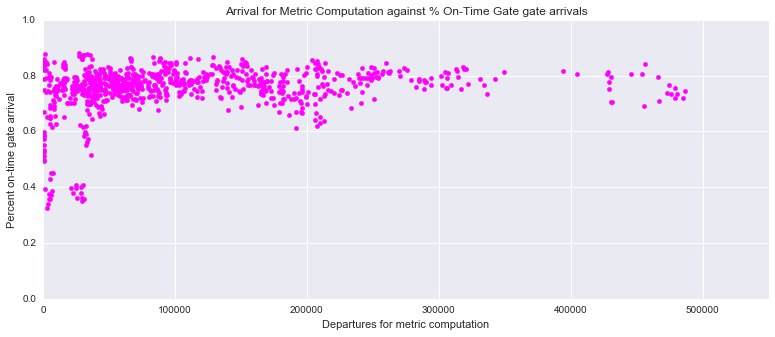

In [142]:
#doesn't seem to be strong correlation between arrivals and delays

plt.figure(figsize=(13,5))
plt.title("Arrival for Metric Computation against % On-Time Gate gate arrivals")
plt.scatter(x=airport_cancel_details["arrivals for metric computation"], y=airport_cancel_details["percent on-time gate arrivals"], color = "magenta")
plt.xlabel("Departures for metric computation")
plt.ylabel("Percent on-time gate arrival")
plt.ylim(0, 1)
plt.xlim(0, 550000)
plt.show()

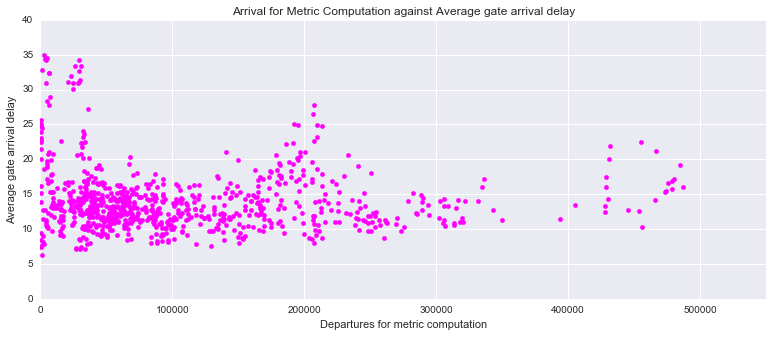

In [143]:
#doesn't seem to be strong correlation between arrivals and delays

plt.figure(figsize=(13,5))
plt.title("Arrival for Metric Computation against Average gate arrival delay")
plt.scatter(x=airport_cancel_details["arrivals for metric computation"], y=airport_cancel_details["average gate arrival delay"], color = "magenta")
plt.xlabel("Departures for metric computation")
plt.ylabel("Average gate arrival delay")
plt.ylim(0, 40)
plt.xlim(0, 550000)
plt.show()

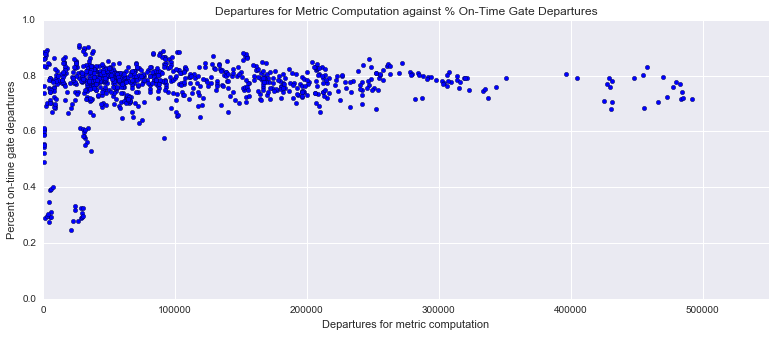

In [144]:
#Nor does it seem to apply for departues
test = airport_cancel_details["departures for metric computation"]
test2 = airport_cancel_details["percent on-time gate departures"]

plt.figure(figsize=(13,5))
plt.title("Departures for Metric Computation against % On-Time Gate Departures")
plt.scatter(x=test, y=test2)
plt.xlabel("Departures for metric computation")
plt.ylabel("Percent on-time gate departures")
plt.ylim(0, 1)
plt.xlim(0, 550000)
plt.show()

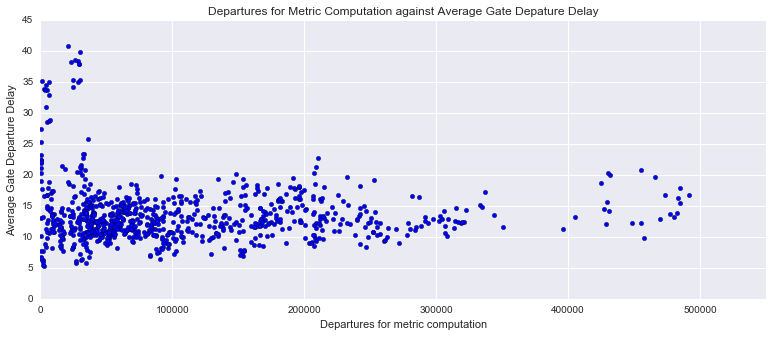

In [145]:
#What does the departures for metric computation do
test = airport_cancel_details["departures for metric computation"]

plt.figure(figsize=(13,5))
plt.title("Departures for Metric Computation against Average Gate Depature Delay")
plt.scatter(x=test, y=airport_cancel_details["average_gate_departure_delay"])
plt.xlabel("Departures for metric computation")
plt.ylabel("Average Gate Departure Delay")
plt.ylim(0, 45)
plt.xlim(0, 550000)
plt.show()

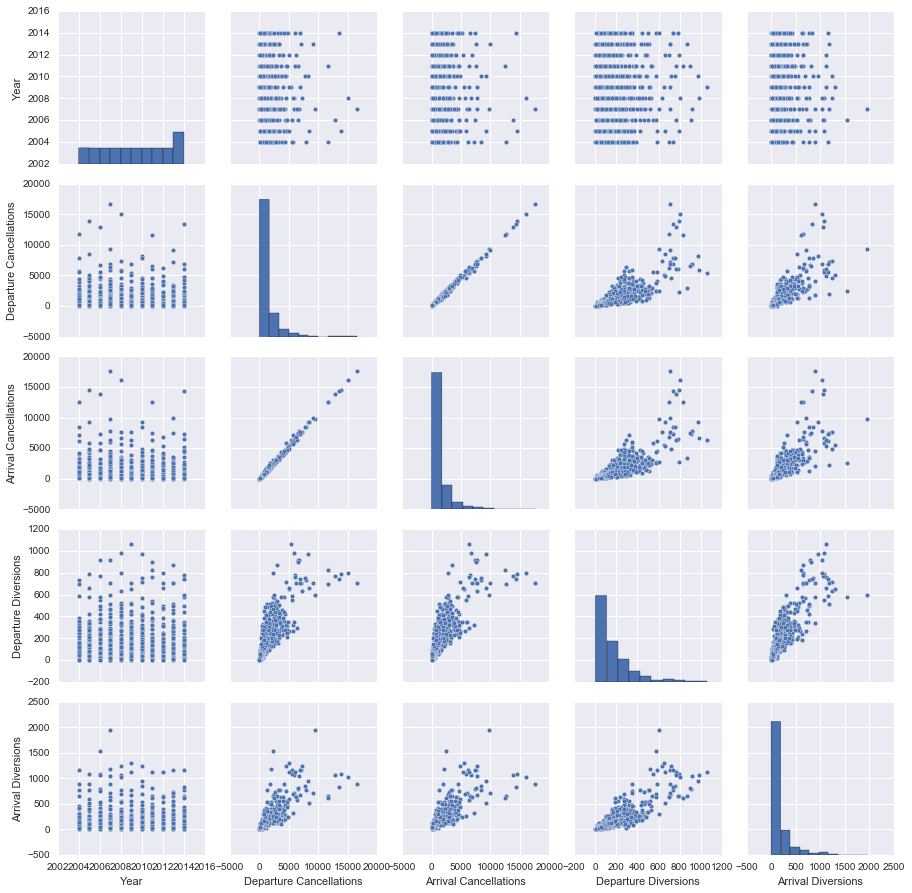

In [152]:
sns.pairplot(airport_cancel_divert)

#arrival and departure cancellations are pretty much the same - probably don't need to include both of them in the eventual analysis
#cancellations and diversions seem like they could be correlated

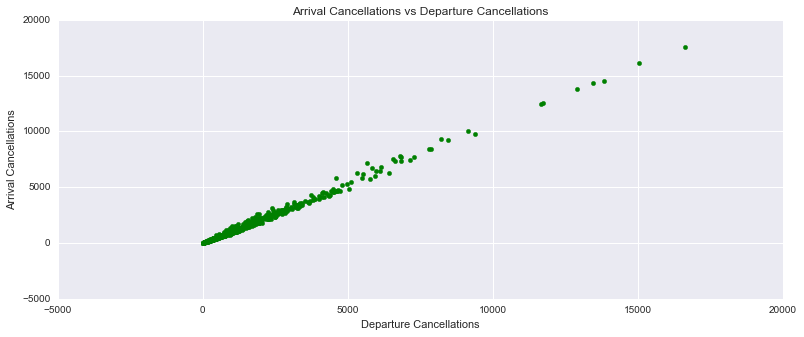

In [164]:
plt.figure(figsize=(13,5))
plt.title("Arrival Cancellations vs Departure Cancellations")
plt.scatter(x=airport_cancel_divert["Departure Cancellations"], y = airport_cancel_divert["Arrival Cancellations"], color="green")
plt.xlabel("Departure Cancellations")
plt.ylabel("Arrival Cancellations")
plt.show()

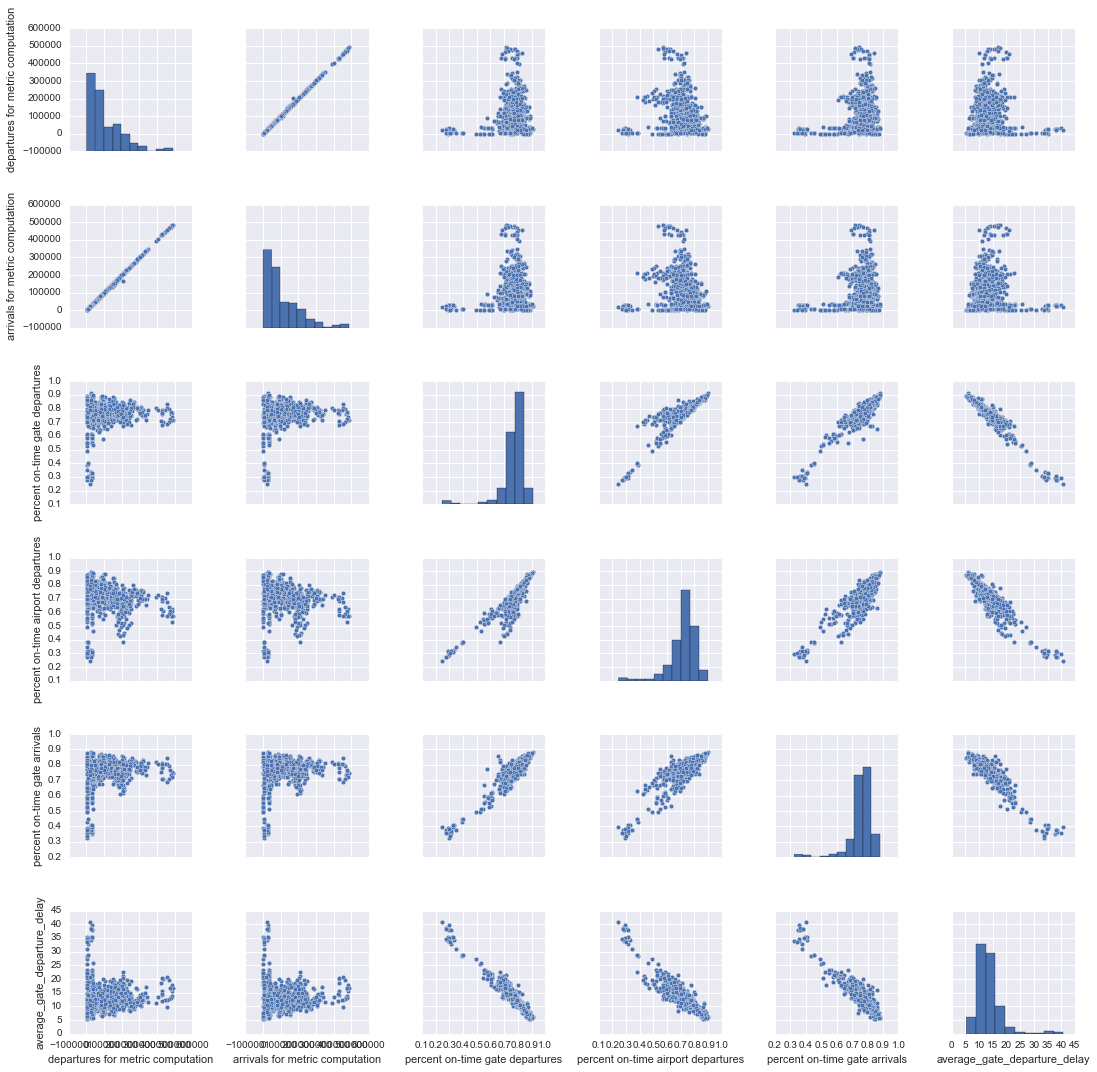

In [161]:
#arrivals are correlated with departures so probably only need one 
#gate seems fairly correlated with the airport (arrivals and departures)
#departures and arrivals are fairly correlated

sns.pairplot(airport_cancel_details[[2,3,4,5,6,7]])

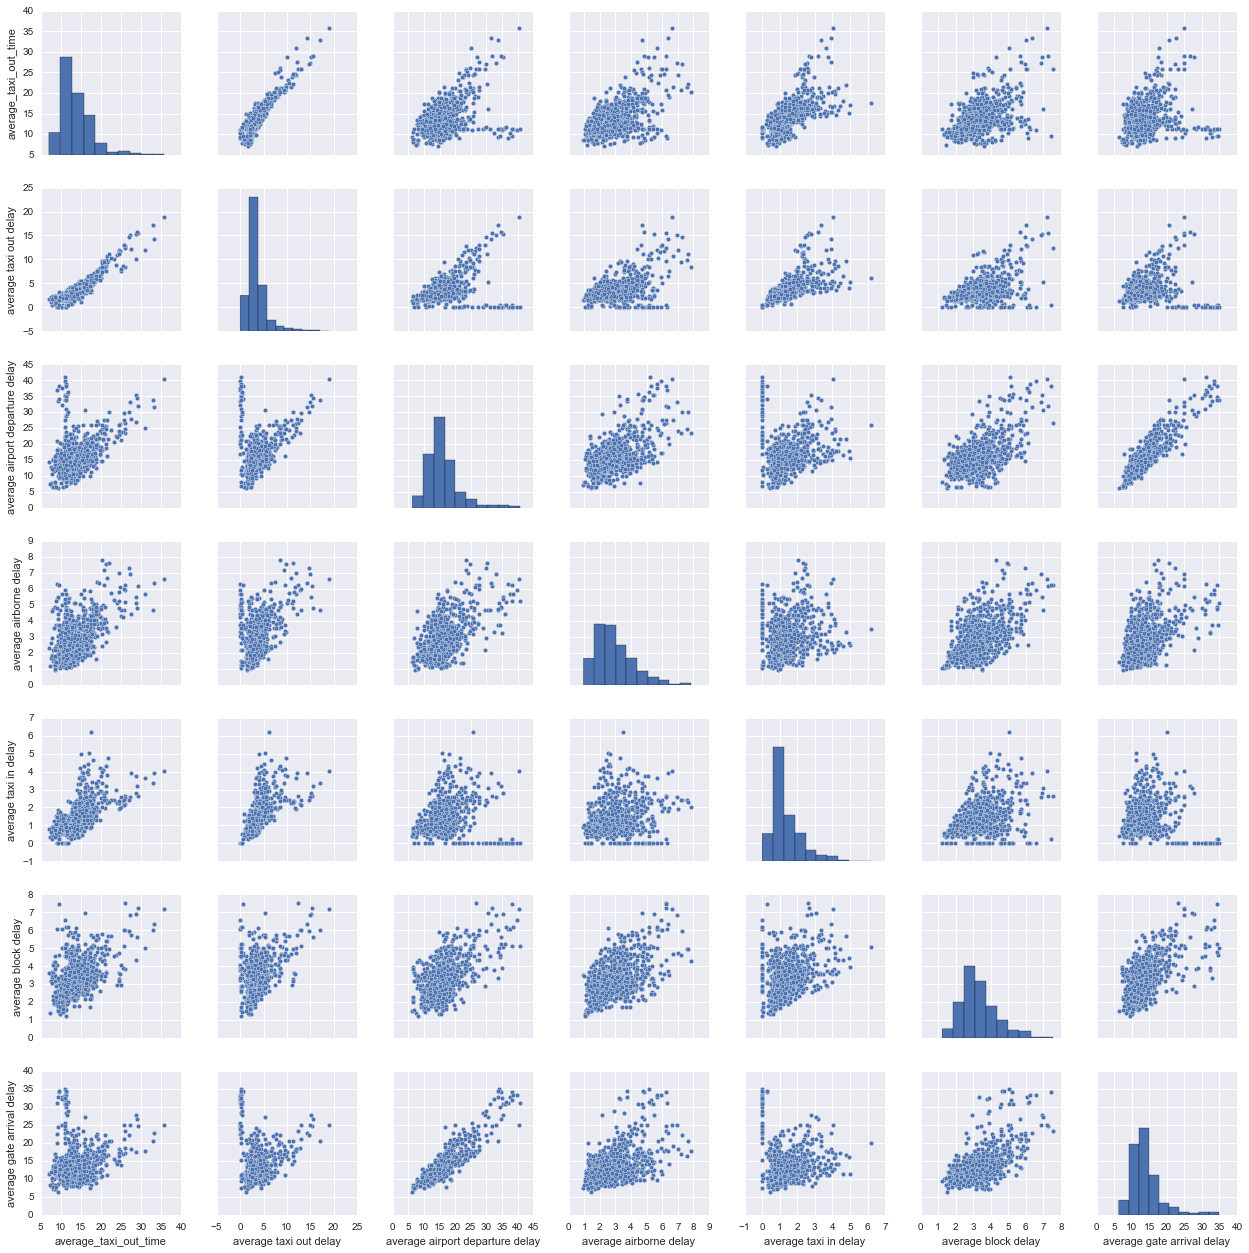

In [163]:
sns.pairplot(airport_cancel_details[[8,9,10,11,12,13,14]])

In [162]:
airport_cancel_details.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  
0                       10.87  
1                       10.24  
2                       11.82  
3                       12.71  
4                       11.48

In [173]:
airport_details.rename(columns = {"LocID": "airport"}, inplace = True)

In [177]:
#begin to concat the data

onegiant = airport_cancel_details.merge(airport_details, how = "left")

In [192]:
onegiant.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay           ...                                ALIAS  \
0                    2.43           ...            Albuquerque Int'l Sunport   
1                    2.29           ...            Albuquerque Int'l Sunport   
2                    2.16           ...            Albuquerque Int'l Sunport   
3                    2.40           ...            Albuquerque Int'l Sunport   
4                    2.41           ...            Albuquerque Int'l Sunport   

   Facility Type  FAA REGION      COUNTY         CITY  STATE  \
0        Airport         ASW  BERNALILLO  ALBUQUERQUE     NM   
1        Airport         ASW  BERNALILLO  ALBUQUERQUE     NM   
2        Airport         ASW  BERNALILLO  ALBUQUERQUE     NM   
3        Airport         ASW  BERNALILLO  ALBUQUERQUE     NM   
4        Airport         ASW  BERNALILLO  ALBUQUERQUE     NM   

                  AP Type   Latitude   Longitude Boundary Data Available  
0  Federalized/Commercial  35.040194 -106.609194                     Yes  
1  Federalized/Commercial  35.040194 -106.609194                     Yes  
2  Federalized/Commercial  35.040194 -106.609194                     Yes  
3  Federalized/Commercial  35.040194 -106.609194                     Yes  
4  Federalized/Commercial  35.040194 -106.609194                     Yes  

[5 rows x 27 columns]

In [196]:
airport_cancel_divert.head()

airport_cancel_divert.rename(columns = {"Airport": "airport", "Year": "year"}, inplace = True)

In [195]:
airport_cancel_divert

airport    Year  Departure Cancellations  Arrival Cancellations  \
0       ABQ  2004.0                    242.0                  235.0   
1       ABQ  2005.0                    221.0                  190.0   
2       ABQ  2006.0                    392.0                  329.0   
3       ABQ  2007.0                    366.0                  304.0   
4       ABQ  2008.0                    333.0                  300.0   
5       ABQ  2009.0                    192.0                  162.0   
6       ABQ  2010.0                    222.0                  177.0   
7       ABQ  2011.0                    345.0                  294.0   
8       ABQ  2012.0                    237.0                  181.0   
9       ABQ  2013.0                    232.0                  212.0   
10      ABQ  2014.0                    315.0                  274.0   
11      ANC  2004.0                    473.0                  532.0   
12      ANC  2005.0                    424.0                  484.0   
13      ANC  2006.0                    367.0                  436.0   
14      ANC  2007.0                    359.0                  423.0   
15      ANC  2008.0                    268.0                  355.0   
16      ANC  2009.0                    354.0                  421.0   
17      ANC  2010.0                    149.0                  204.0   
18      ANC  2011.0                    191.0                  265.0   
19      ANC  2012.0                    216.0                  284.0   
20      ANC  2013.0                    141.0                  184.0   
21      ANC  2014.0                    111.0                  162.0   
22      ATL  2004.0                   7870.0                 8433.0   
23      ATL  2005.0                  13837.0                14480.0   
24      ATL  2006.0                   6624.0                 7301.0   
25      ATL  2007.0                   6796.0                 7790.0   
26      ATL  2008.0                   5830.0                 6705.0   
27      ATL  2009.0                   5324.0                 6303.0   
28      ATL  2010.0                   8198.0                 9279.0   
29      ATL  2011.0                   6555.0                 7484.0   
..      ...     ...                      ...                    ...   
775     SWF  2007.0                    120.0                  103.0   
776     SWF  2008.0                     53.0                   41.0   
777     SWF  2009.0                     29.0                   18.0   
778     SWF  2010.0                     67.0                   54.0   
779     SWF  2011.0                     42.0                   40.0   
780     SWF  2012.0                     14.0                   12.0   
781     SWF  2013.0                     27.0                   23.0   
782     SWF  2014.0                     17.0                   11.0   
783     TPA  2004.0                   1167.0                 1016.0   
784     TPA  2005.0                    771.0                  746.0   
785     TPA  2006.0                    427.0                  356.0   
786     TPA  2007.0                    705.0                  655.0   
787     TPA  2008.0                    727.0                  654.0   
788     TPA  2009.0                    349.0                  307.0   
789     TPA  2010.0                    709.0                  655.0   
790     TPA  2011.0                    667.0                  622.0   
791     TPA  2012.0                    450.0                  411.0   
792     TPA  2013.0                    326.0                  301.0   
793     TPA  2014.0                    723.0                  691.0   
794     TUS  2004.0                    103.0                   80.0   
795     TUS  2005.0                    126.0                  101.0   
796     TUS  2006.0                    206.0                  174.0   
797     TUS  2007.0                    281.0                  237.0   
798     TUS  2008.0                    206.0                  174.0   
799     TUS  2009.0         

In [1139]:
giant_data = onegiant.merge(airport_cancel_divert, on = ["airport", "year"], how = "left")

In [200]:
#FINAL DATA - will confirm if all merges worked
giant_data[giant_data["airport"] == "TPA"]

airport  year  departures for metric computation  \
808     TPA  2004                             100556   
809     TPA  2005                             111899   
810     TPA  2006                             106426   
811     TPA  2007                             107523   
812     TPA  2008                             100289   
813     TPA  2009                              83888   
814     TPA  2010                              82346   
815     TPA  2011                              81837   
816     TPA  2012                              80605   
817     TPA  2013                              80603   
818     TPA  2014                              79489   

     arrivals for metric computation  percent on-time gate departures  \
808                           100312                           0.8245   
809                           111953                           0.7996   
810                           106040                           0.8129   
811                           107579                           0.7903   
812                           100528                           0.7983   
813                            84140                           0.8154   
814                            82582                           0.8121   
815                            81897                           0.8296   
816                            80523                           0.8322   
817                            79946                           0.7997   
818                            79173                           0.7726   

     percent on-time airport departures  percent on-time gate arrivals  \
808                              0.8023                         0.7921   
809                              0.7656                         0.7696   
810                              0.7871                         0.7869   
811                              0.7620                         0.7542   
812                              0.7684                         0.7672   
813                              0.7875                         0.7965   
814                              0.7775                         0.7988   
815                              0.8054                         0.8044   
816                              0.8096                         0.8080   
817                              0.7750                         0.7774   
818                              0.7454                         0.7536   

     average_gate_departure_delay  average_taxi_out_time  \
808                          9.85                  11.88   
809                         11.39                  12.17   
810                         10.78                  12.13   
811                         12.55                  12.03   
812                         12.39                  12.19   
813                         10.86                  12.05   
814                         11.02                  12.45   
815                         10.60                  11.93   
816                         10.51                  11.69   
817                         11.90                  11.86   
818                         14.33                  12.00   

     average taxi out delay        ...           CITY  STATE  \
808                    2.39        ...          TAMPA     FL   
809                    3.12        ...          TAMPA     FL   
810                    2.87        ...          TAMPA     FL   
811                    2.78        ...          TAMPA     FL   
812                    2.85        ...          TAMPA     FL   
813                    2.59        ...          TAMPA     FL   
814                    3.03        ...          TAMPA     FL   
815                    2.42        ...          TAMPA     FL   
816                    2.19        ...          TAMPA     FL   
817                    2.36        ...          TAMPA     FL   
818                    2.39        ...          TAMPA     FL   

                    AP Type   Latitude  Longitude  Boundary Data Available 

In [336]:
airport_cancel_details[airport_cancel_details["airport"] == "TPA"]

airport  year  departures for metric computation  \
808     TPA  2004                             100556   
809     TPA  2005                             111899   
810     TPA  2006                             106426   
811     TPA  2007                             107523   
812     TPA  2008                             100289   
813     TPA  2009                              83888   
814     TPA  2010                              82346   
815     TPA  2011                              81837   
816     TPA  2012                              80605   
817     TPA  2013                              80603   
818     TPA  2014                              79489   

     arrivals for metric computation  percent on-time gate departures  \
808                           100312                           0.8245   
809                           111953                           0.7996   
810                           106040                           0.8129   
811                           107579                           0.7903   
812                           100528                           0.7983   
813                            84140                           0.8154   
814                            82582                           0.8121   
815                            81897                           0.8296   
816                            80523                           0.8322   
817                            79946                           0.7997   
818                            79173                           0.7726   

     percent on-time airport departures  percent on-time gate arrivals  \
808                              0.8023                         0.7921   
809                              0.7656                         0.7696   
810                              0.7871                         0.7869   
811                              0.7620                         0.7542   
812                              0.7684                         0.7672   
813                              0.7875                         0.7965   
814                              0.7775                         0.7988   
815                              0.8054                         0.8044   
816                              0.8096                         0.8080   
817                              0.7750                         0.7774   
818                              0.7454                         0.7536   

     average_gate_departure_delay  average_taxi_out_time  \
808                          9.85                  11.88   
809                         11.39                  12.17   
810                         10.78                  12.13   
811                         12.55                  12.03   
812                         12.39                  12.19   
813                         10.86                  12.05   
814                         11.02                  12.45   
815                         10.60                  11.93   
816                         10.51                  11.69   
817                         11.90                  11.86   
818                         14.33                  12.00   

     average taxi out delay  average airport departure delay  \
808                    2.39                            11.53   
809                    3.12                            13.76   
810                    2.87                            12.70   
811                    2.78                            14.49   
812                    2.85                            14.37   
813                    2.59                            12.64   
814                    3.03                            13.21   
815                    2.42                            12.19   
816                    2.19                            11.88   
817                    2.36                            13.39   
818                    2.39                            15.97   

     average airborne delay  average taxi in delay  average block delay  \


In [203]:
airport_cancel_divert[airport_cancel_divert["airport"] == "TPA"]

airport    year  Departure Cancellations  Arrival Cancellations  \
783     TPA  2004.0                   1167.0                 1016.0   
784     TPA  2005.0                    771.0                  746.0   
785     TPA  2006.0                    427.0                  356.0   
786     TPA  2007.0                    705.0                  655.0   
787     TPA  2008.0                    727.0                  654.0   
788     TPA  2009.0                    349.0                  307.0   
789     TPA  2010.0                    709.0                  655.0   
790     TPA  2011.0                    667.0                  622.0   
791     TPA  2012.0                    450.0                  411.0   
792     TPA  2013.0                    326.0                  301.0   
793     TPA  2014.0                    723.0                  691.0   

     Departure Diversions  Arrival Diversions  
783                 154.0               139.0  
784                 212.0               103.0  
785                 197.0               189.0  
786                 186.0               121.0  
787                 194.0               182.0  
788                 201.0               102.0  
789                 157.0               140.0  
790                 176.0               137.0  
791                 131.0               132.0  
792                 152.0               118.0  
793                 183.0               163.0

In [202]:
airport_details[airport_details["airport"] == "TPA"]

Key airport     AP_NAME                ALIAS Facility Type FAA REGION  \
103  864.0     TPA  TAMPA INTL  Tampa Int'l Airport       Airport        ASO   

           COUNTY   CITY STATE                 AP Type   Latitude  Longitude  \
103  HILLSBOROUGH  TAMPA    FL  Federalized/Commercial  27.975472  -82.53325   

    Boundary Data Available  
103                     Yes

In [1140]:
giant_data.columns

del giant_data["AP Type"]
del giant_data["Boundary Data Available"]
del giant_data["Key"]
del giant_data["Facility Type"]
del giant_data["AP_NAME"]

In [1141]:
#clean up giant_data

giant_data.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'ALIAS',
       u'FAA REGION', u'COUNTY', u'CITY', u'STATE', u'Latitude', u'Longitude',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

In [217]:
giant_data.head(1).T

0
airport                                                   ABQ
year                                                     2004
departures for metric computation                       53971
arrivals for metric computation                         53818
percent on-time gate departures                         0.803
percent on-time airport departures                     0.7809
percent on-time gate arrivals                          0.7921
average_gate_departure_delay                            10.38
average_taxi_out_time                                    9.89
average taxi out delay                                   2.43
average airport departure delay                          12.1
average airborne delay                                   2.46
average taxi in delay                                    0.83
average block delay                                      2.55
average gate arrival delay                              10.87
ALIAS                               Albuquerque Int'l Sunport
FAA REGION                                                ASW
COUNTY                                             BERNALILLO
CITY                                              ALBUQUERQUE
STATE                                                      NM
Latitude                                              35.0402
Longitude                                            -106.609
Departure Cancellations                                   242
Arrival Cancellations                                     235
Departure Diversions                                       71
Arrival Diversions                                         46

In [220]:
giant_data["airport"].value_counts()

LAS    11
BUR    11
VNY    11
OAK    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
GYY    11
SAT    11
RDU    11
MEM    11
ISP    11
TEB    11
MHT    11
SJC    11
SWF    11
MKE    11
ONT    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
HNL    11
MSP    11
       ..
SFO    11
SDF    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
PIT    11
OMA    11
MCO    11
SLC    11
BDL    11
DFW    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

In [221]:
giant_data[giant_data["airport"] == "VNY"]

airport  year  departures for metric computation  \
830     VNY  2004                               1331   
831     VNY  2005                               5235   
832     VNY  2006                               6142   
833     VNY  2007                               6179   
834     VNY  2008                               4282   
835     VNY  2009                               2986   
836     VNY  2010                               3420   
837     VNY  2011                               4134   
838     VNY  2012                               4753   
839     VNY  2013                               6096   
840     VNY  2014                               7412   

     arrivals for metric computation  percent on-time gate departures  \
830                             1301                           0.2900   
831                             5169                           0.2930   
832                             6112                           0.3097   
833                             6349                           0.2936   
834                             4469                           0.2756   
835                             3005                           0.2971   
836                             3500                           0.3023   
837                             4134                           0.3474   
838                             4787                           0.3909   
839                             6165                           0.3924   
840                             7573                           0.4014   

     percent on-time airport departures  percent on-time gate arrivals  \
830                              0.3178                         0.3920   
831                              0.2835                         0.3562   
832                              0.3167                         0.3724   
833                              0.2921                         0.3853   
834                              0.2723                         0.3571   
835                              0.2954                         0.3241   
836                              0.3018                         0.3394   
837                              0.3454                         0.3752   
838                              0.3859                         0.4299   
839                              0.3778                         0.4513   
840                              0.3841                         0.4507   

     average_gate_departure_delay  average_taxi_out_time  \
830                         35.15                   9.20   
831                         33.75                   9.55   
832                         32.83                  10.33   
833                         34.96                  11.06   
834                         34.45                  11.24   
835                         33.86                  11.15   
836                         33.63                  11.22   
837                         30.96                  11.17   
838                         28.50                  11.20   
839                         28.61                  11.48   
840                         28.87                  11.70   

     average taxi out delay        ...          FAA REGION       COUNTY  \
830                    0.00        ...                 AWP  LOS ANGELES   
831                    0.53        ...                 AWP  LOS ANGELES   
832                    0.05        ...                 AWP  LOS ANGELES   
833                    0.09        ...                 AWP  LOS ANGELES   
834                    0.16        ...                 AWP  LOS ANGELES   
835                    0.10        ...                 AWP  LOS ANGELES   
836                    0.15        ...                 AWP  LOS ANGELES   
837                    0.12        ...                 AWP  LOS ANGELES   
838                    0.14        ...                 AWP  LOS ANGELES   
839                    0.40        ...                 AWP  LOS ANGELES   
840                

In [224]:
#note about the data: 
#GYY, TEB, VNY missing things - doesn't seem to have a related geo. will remove data

print airport_details[airport_details["airport"] == "GYY"]
print airport_details[airport_details["airport"] == "TEB"]
print airport_details[airport_details["airport"] == "VNY"]

         Key airport            AP_NAME                 ALIAS Facility Type  \
3108  1256.0     GYY  GARY/CHICAGO INTL  Gary/Chicago Airport       Airport   

     FAA REGION COUNTY  CITY STATE                 AP Type   Latitude  \
3108        AGL   LAKE  GARY    IN  Federalized/Commercial  41.616278   

      Longitude Boundary Data Available  
3108 -87.412778                     Yes  
         Key airport    AP_NAME              ALIAS Facility Type FAA REGION  \
2833  2341.0     TEB  TETERBORO  Teterboro Airport       Airport        AEA   

      COUNTY       CITY STATE     AP Type   Latitude  Longitude  \
2833  BERGEN  TETERBORO    NJ  Public Use  40.850101 -74.060836   

     Boundary Data Available  
2833                     Yes  
        Key airport   AP_NAME             ALIAS Facility Type FAA REGION  \
1022  679.0     VNY  VAN NUYS  Van Nuys Airport       Airport        AWP   

           COUNTY      CITY STATE     AP Type   Latitude   Longitude  \
1022  LOS ANGELES  VAN NUYS  

In [1142]:
#"GYY", "TEB", "VNY" remove

giant_data = giant_data[giant_data["airport"] != "GYY"]
giant_data = giant_data[giant_data["airport"] != "TEB"]
giant_data = giant_data[giant_data["airport"] != "VNY"]


In [1143]:
len(giant_data["airport"].value_counts())

74

In [233]:
#PSP and SMF will be missing values
giant_data["airport"].value_counts()

LAS    11
STL    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
JAX    11
OAK    11
BUR    11
MHT    11
HNL    11
MKE    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
MSP    11
SWF    11
SAN    11
       ..
SNA    11
SDF    11
DFW    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
BHM    11
PIT    11
OMA    11
MCO    11
IAD    11
OXR    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
RFD    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
SLC    11
JFK    11
PSP     8
SMF     8
Name: airport, dtype: int64

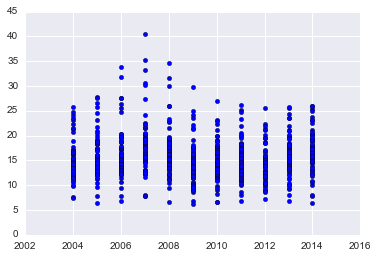

In [237]:
#doesnnt look like there's a real correlation with year
plt.scatter(x=giant_data["year"], y = giant_data["average airport departure delay"])

In [254]:
delayed_airports = pd.pivot_table(giant_data, index = ["airport"], values = ["average airport departure delay"],aggfunc=np.mean).sort_values("average airport departure delay", ascending = False)


In [1181]:
delayed_airports.head()

average airport departure delay
airport                                 
EWR                            27.867273
JFK                            27.430909
LGA                            25.775455
HPN                            24.567273
PHL                            23.183636

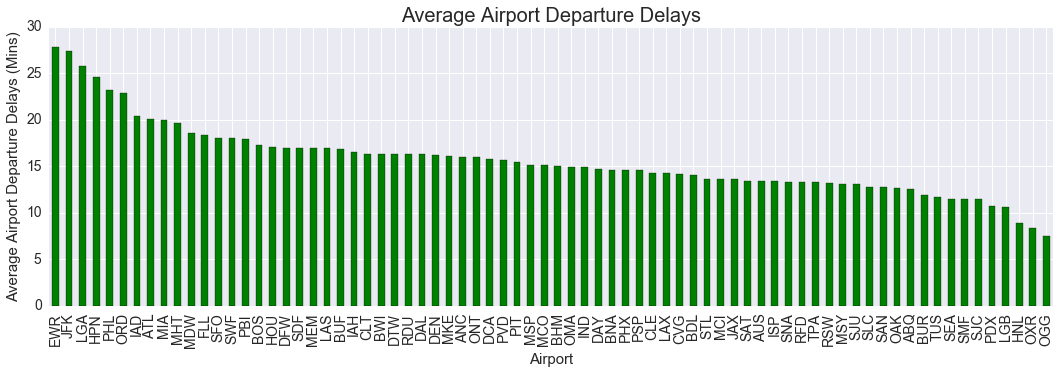

In [1182]:

delayed_airports.plot(kind = "bar", figsize = (18,5), color = "green")

ax = plt.gca()
ax.set_title("Average Airport Departure Delays", size = 20)
ax.set_ylabel("Average Airport Departure Delays (Mins)", size = 15)
ax.set_xlabel("Airport", size=15)
ax.legend_.remove()
plt.show()


In [ ]:
delayed_airports.plot(kind = "bar", figsize = (20,5), color = "green")

ax = plt.gca()
ax.set_title("Average Airport Departure Delays", size = 20)
ax.set_ylabel("Average Airport Departure Delays", size = 13)
ax.set_xlabel("Airport", size=13)
ax.legend_.remove()
plt.show()

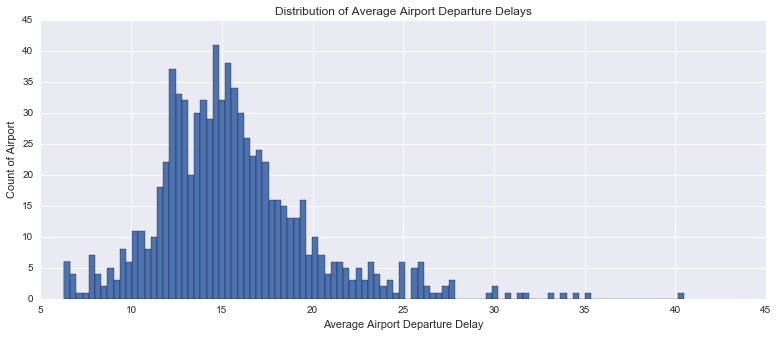

In [265]:
giant_data["average airport departure delay"].plot(kind = "hist", bins = 100, figsize = (13,5))

ax = plt.gca()
ax.set_title("Distribution of Average Airport Departure Delays")
ax.set_ylabel("Count of Airport")
ax.set_xlabel("Average Airport Departure Delay")

plt.show()

In [274]:
faa_region = pd.pivot_table(giant_data, index = ["FAA REGION"], values = ["average airport departure delay"],aggfunc=np.mean).sort_values("average airport departure delay", ascending = False)

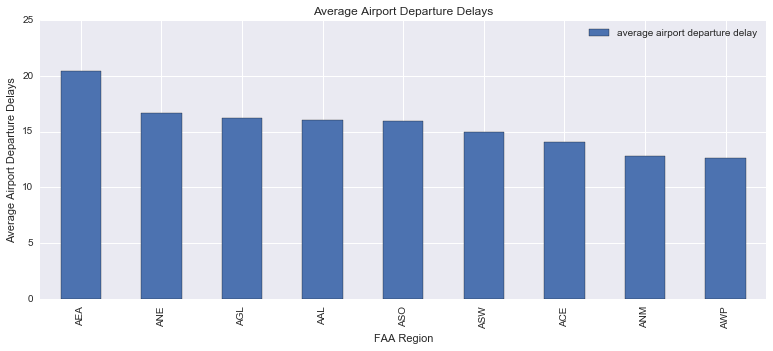

In [275]:
#highest is AEA in northeast
faa_region.plot(kind = "bar", figsize = (13,5))

ax = plt.gca()
ax.set_title("Average Airport Departure Delays")
ax.set_ylabel("Average Airport Departure Delays")
ax.set_xlabel("FAA Region")

plt.show()


In [268]:
giant_data["FAA REGION"].value_counts()

AWP    181
ASO    176
AEA    132
AGL     99
ASW     88
ANM     44
ANE     44
ACE     33
AAL     11
Name: FAA REGION, dtype: int64

In [269]:
giant_data["COUNTY"].value_counts()

ORANGE            33
JEFFERSON         33
LOS ANGELES       33
COOK              22
QUEENS            22
HILLSBOROUGH      22
SUFFOLK           22
HARRIS            22
WINNEBAGO         11
KING              11
MULTNOMAH         11
DALLAS            11
ST LOUIS CITY     11
SAN DIEGO         11
LEE               11
ALAMEDA           11
ESSEX             11
DENVER            11
MONTGOMERY        11
SAN MATEO         11
ANCHORAGE         11
ERIE              11
MARION            11
MARICOPA          11
HONOLULU          11
BOONE             11
HENNEPIN          11
PALM BEACH        11
VENTURA           11
TRAVIS            11
                  ..
PHILADELPHIA      11
FULTON            11
PIMA              11
DAVIDSON          11
SAN BERNARDINO    11
ALLEGHENY         11
KENT              11
CLARK             11
WESTCHESTER       11
BERNALILLO        11
ANNE ARUNDEL      11
SHELBY            11
DADE              11
MECKLENBURG       11
#NAME?            11
TARRANT           11
SALT LAKE    

In [320]:
giant_data[giant_data["COUNTY"] == "#NAME?"]

year  departures for metric computation  arrivals for metric computation  \
734  2004                              60371                            56735   
735  2005                              57736                            54870   
736  2006                              55707                            52948   
737  2007                              47987                            47246   
738  2008                              44493                            43448   
739  2009                              48418                            46678   
740  2010                              47314                            45781   
741  2011                              42803                            42401   
742  2012                              44716                            43985   
743  2013                              42902                            42175   
744  2014                              43671                            42965   

     percent on-time gate departures  percent on-time airport departures  \
734                           0.8019                              0.7794   
735                           0.7789                              0.7464   
736                           0.8054                              0.7446   
737                           0.8014                              0.7522   
738                           0.8004                              0.7810   
739                           0.8168                              0.8015   
740                           0.7967                              0.7815   
741                           0.8179                              0.7934   
742                           0.8417                              0.8228   
743                           0.8058                              0.7808   
744                           0.8056                              0.7784   

     percent on-time gate arrivals  average_gate_departure_delay  \
734                         0.7984                         11.19   
735                         0.7604                         12.74   
736                         0.7611                         11.61   
737                         0.7414                         12.53   
738                         0.7533                         12.54   
739                         0.7999                         11.44   
740                         0.7719                         12.21   
741                         0.7899                         10.86   
742                         0.8181                          9.55   
743                         0.7840                         12.31   
744                         0.7815                         11.71   

     average_taxi_out_time  average taxi out delay  average airborne delay  \
734                  13.84                    2.27                    1.88   
735                  14.14                    3.03                    1.63   
736                  15.75                    4.28                    1.73   
737                  15.22                    3.16                    1.55   
738                  14.22                    1.85                    1.64   
739                  13.29                    1.43                    1.22   
740                  13.04                    1.39                    1.65   
741                  13.23                    1.96                    1.45   
742                  13.15                    1.82                    1.41   
743                  13.56                    2.20                    1.78   
744                  12.89                    1.88                    1.81   

     average taxi in delay  average block delay  average gate arrival delay  \
734                   0.79                 3.39                       12.28   
735                   1.36                 4.04                       14.65   
736                   1.29                 4.19                       14.17   
737                   1.71                 4.09  

In [1144]:
giant_data["COUNTY"] = giant_data["COUNTY"].apply(lambda x: "PR" if x == "#NAME?" else x)

In [271]:
giant_data["CITY"].value_counts()

NEW YORK             33
HOUSTON              22
WASHINGTON           22
CHICAGO              22
CHICAGO/ROCKFORD     11
ONTARIO              11
KAHULUI              11
DALLAS               11
SAN DIEGO            11
PHILADELPHIA         11
DENVER               11
NEWARK               11
PROVIDENCE           11
FORT MYERS           11
LAS VEGAS            11
DALLAS-FORT WORTH    11
LOS ANGELES          11
FORT LAUDERDALE      11
BALTIMORE            11
ATLANTA              11
JACKSONVILLE         11
WINDSOR LOCKS        11
SANTA ANA            11
HONOLULU             11
SAN JUAN             11
BIRMINGHAM           11
COVINGTON            11
WHITE PLAINS         11
WEST PALM BEACH      11
DETROIT              11
                     ..
OAKLAND              11
MANCHESTER           11
CLEVELAND            11
NEW ORLEANS          11
TUCSON               11
ALBUQUERQUE          11
NASHVILLE            11
PHOENIX              11
CHARLOTTE            11
SALT LAKE CITY       11
BUFFALO         

In [272]:
giant_data["STATE"].value_counts()

CA    126
FL     77
NY     66
TX     66
IL     33
PA     22
TN     22
KY     22
NC     22
AZ     22
OH     22
HI     22
MO     22
DC     22
NJ     11
NM     11
NH     11
LA     11
NE     11
WI     11
OR     11
NV     11
PR     11
RI     11
CO     11
AK     11
AL     11
GA     11
IN     11
CT     11
MD     11
MA     11
UT     11
MN     11
MI     11
WA     11
Name: STATE, dtype: int64

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [1145]:
#delete "Arrival Cancellations" since it was basically one to one correlated to departure cancellations

del giant_data["Arrival Cancellations"]

giant_data.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'ALIAS',
       u'FAA REGION', u'COUNTY', u'CITY', u'STATE', u'Latitude', u'Longitude',
       u'Departure Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [342]:
#begin to create dummies and form X and Y
giant_data.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
ALIAS                                  object
FAA REGION                             object
COUNTY                                 object
CITY                                   object
STATE                                  object
Latitude                              float64
Longitude                         

In [1146]:
del giant_data["Latitude"]
del giant_data["Longitude"]
del giant_data["ALIAS"]

In [1147]:
giant_data = giant_data.dropna()

In [1148]:
giant_data.isnull().sum().sum()

0

In [432]:
giant_data.isnull().any()

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
FAA REGION                            False
COUNTY                                False
CITY                                  False
STATE                                 False
Departure Cancellations               False
Departure Diversions                  False
Arrival Diversions                    False
dtype: bool

In [1197]:
giant_data.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay         ...          average taxi in delay  \
0                    2.43         ...                           0.83   
1                    2.29         ...                           0.89   
2                    2.16         ...                           0.84   
3                    2.40         ...                           1.29   
4                    2.41         ...                           1.03   

   average block delay  average gate arrival delay  FAA REGION      COUNTY  \
0                 2.55                       10.87         ASW  BERNALILLO   
1                 2.34                       10.24         ASW  BERNALILLO   
2                 2.66                       11.82         ASW  BERNALILLO   
3                 3.06                       12.71         ASW  BERNALILLO   
4                 2.79                       11.48         ASW  BERNALILLO   

          CITY STATE Departure Cancellations Departure Diversions  \
0  ALBUQUERQUE    NM                   242.0                 71.0   
1  ALBUQUERQUE    NM                   221.0                 61.0   
2  ALBUQUERQUE    NM                   392.0                 71.0   
3  ALBUQUERQUE    NM                   366.0                107.0   
4  ALBUQUERQUE    NM                   333.0                 79.0   

   Arrival Diversions  
0                46.0  
1                33.0  
2               124.0  
3                45.0  
4                42.0  

[5 rows x 22 columns]

In [370]:
#manually check for NAs
giant_data["departures for metric computation"].unique()

array([ 53971,  51829,  49682,  53255,  49589,  42550,  42302,  42283,
        39105,  35277,  33292,  16503,  72043,  75708,  78741,  76606,
        67252,  73089,  72556,  70322,  69984,  71099, 477323, 484570,
       483334, 491826, 482903, 479957, 469542, 454954, 457501, 448180,
       428954,  14094,  55790,  56809,  62255,  60425,  53686,  54502,
        55584,  56043,  58240,  60588,  52897,  58287,  54169,  52603,
        47467,  39994,  39685,  42774,  39274,  38505,  39279,   9336,
        36146,  33169,  35612,  34605,  29422,  29563,  27376,  26436,
        24460,  23725,  84167,  83922,  80868,  81020,  75174,  69219,
        69024,  69429,  69369,  71623,  70497, 188413, 190420, 187003,
       183078, 170491, 162271, 164933, 168358, 161639, 167549, 170013,
        12215,  46558,  45322,  44568,  43245,  40467,  39546,  39067,
        38909,  38706,  34314,  38148,  40769,  42697,  43833,  40341,
        34863,  34610,  32875,  32152,  31469,  30148, 131690, 132011,
      

In [371]:
giant_data["arrivals for metric computation"].unique()

array([ 53818,  51877,  51199,  53611,  49512,  42704,  42169,  42297,
        39107,  34989,  33137,  15511,  67034,  69995,  73323,  72479,
        63135,  68125,  66845,  66453,  65469,  66704, 473249, 480171,
       478735, 486799, 478627, 475882, 465911, 453734, 455968, 445498,
       428312,  14052,  55678,  56704,  62685,  60559,  53651,  54481,
        55526,  55752,  58316,  60264,  52093,  57128,  53701,  52050,
        46956,  39698,  39309,  42628,  39122,  38508,  39109,   9557,
        36973,  33672,  35925,  34766,  29959,  29907,  27705,  26597,
        24402,  23682,  84551,  84108,  80903,  81183,  75172,  69209,
        69292,  69281,  69234,  71103,  70414, 184869, 185755, 182418,
       179565, 166566, 160775, 162520, 164961, 158227, 164108, 165166,
        12188,  46582,  45345,  44509,  42984,  40256,  39398,  38890,
        38714,  38393,  34112,  37293,  40424,  42915,  43406,  40135,
        34744,  34039,  32495,  31902,  31215,  29885, 131476, 131803,
      

In [372]:
giant_data["percent on-time gate departures"].unique()

array([ 0.803 ,  0.814 ,  0.7983,  0.8005,  0.8103,  0.8341,  0.8144,
        0.8072,  0.8219,  0.771 ,  0.7451,  0.7109,  0.7394,  0.7771,
        0.7838,  0.7972,  0.8112,  0.7992,  0.8276,  0.8442,  0.8432,
        0.8288,  0.7596,  0.7413,  0.715 ,  0.7167,  0.7696,  0.7775,
        0.7961,  0.8008,  0.832 ,  0.7917,  0.7899,  0.7845,  0.8107,
        0.7826,  0.7789,  0.7986,  0.8154,  0.8068,  0.8051,  0.8083,
        0.7716,  0.7627,  0.8222,  0.8108,  0.794 ,  0.783 ,  0.8105,
        0.8349,  0.8042,  0.8166,  0.7931,  0.7953,  0.7822,  0.7815,
        0.7537,  0.7583,  0.7715,  0.7785,  0.7792,  0.7898,  0.7691,
        0.7421,  0.7849,  0.7837,  0.7649,  0.7513,  0.7713,  0.7733,
        0.7883,  0.8155,  0.7639,  0.7404,  0.8095,  0.7728,  0.7739,
        0.7553,  0.7897,  0.8209,  0.7878,  0.8204,  0.7987,  0.8067,
        0.7764,  0.7535,  0.7477,  0.729 ,  0.7606,  0.7901,  0.7663,
        0.7857,  0.7736,  0.7584,  0.7762,  0.7804,  0.7948,  0.8419,
        0.8092,  0.8

In [373]:
giant_data["percent on-time airport departures"].unique()

array([ 0.7809,  0.7922,  0.7756,  0.7704,  0.7844,  0.8147,  0.7907,
        0.7758,  0.794 ,  0.7402,  0.7148,  0.677 ,  0.7061,  0.7455,
        0.7457,  0.7698,  0.7952,  0.776 ,  0.805 ,  0.8235,  0.8228,
        0.8074,  0.5757,  0.6216,  0.5324,  0.5713,  0.6071,  0.59  ,
        0.6405,  0.673 ,  0.7401,  0.7025,  0.7134,  0.7658,  0.7892,
        0.7579,  0.7499,  0.773 ,  0.7943,  0.7857,  0.7841,  0.784 ,
        0.7433,  0.7382,  0.7719,  0.7668,  0.7496,  0.7305,  0.7682,
        0.7944,  0.7707,  0.7676,  0.7863,  0.7521,  0.7605,  0.7528,
        0.7555,  0.7279,  0.7257,  0.7406,  0.7362,  0.7303,  0.7573,
        0.7832,  0.7327,  0.7183,  0.7597,  0.7614,  0.7339,  0.7282,
        0.7424,  0.7722,  0.736 ,  0.7602,  0.791 ,  0.7292,  0.7064,
        0.7234,  0.6902,  0.694 ,  0.6567,  0.7075,  0.7492,  0.727 ,
        0.7065,  0.7563,  0.7174,  0.7295,  0.7403,  0.716 ,  0.712 ,
        0.6837,  0.7239,  0.7502,  0.7338,  0.7638,  0.7248,  0.7237,
        0.7637,  0.7

In [374]:
giant_data["percent on-time gate arrivals"].unique()

array([ 0.7921,  0.8001,  0.7746,  0.7647,  0.7875,  0.8224,  0.8047,
        0.8022,  0.8177,  0.7554,  0.732 ,  0.6502,  0.6955,  0.711 ,
        0.7196,  0.7573,  0.8264,  0.8045,  0.8292,  0.8521,  0.8631,
        0.86  ,  0.737 ,  0.7337,  0.7205,  0.7446,  0.7559,  0.7335,
        0.7956,  0.8068,  0.8422,  0.807 ,  0.8123,  0.7486,  0.7641,
        0.7424,  0.7241,  0.7473,  0.772 ,  0.7734,  0.7738,  0.7769,
        0.7261,  0.7222,  0.768 ,  0.7549,  0.7488,  0.7226,  0.7525,
        0.7933,  0.7748,  0.7715,  0.7832,  0.7493,  0.7569,  0.7282,
        0.719 ,  0.6976,  0.7055,  0.7289,  0.7443,  0.7449,  0.7509,
        0.7638,  0.7165,  0.7016,  0.7655,  0.7472,  0.7265,  0.7518,
        0.7871,  0.783 ,  0.7869,  0.805 ,  0.7599,  0.7364,  0.7755,
        0.7267,  0.7175,  0.7024,  0.7311,  0.7649,  0.7612,  0.7378,
        0.795 ,  0.7682,  0.7696,  0.7173,  0.7104,  0.7095,  0.6785,
        0.7287,  0.761 ,  0.7534,  0.7574,  0.7744,  0.7437,  0.7376,
        0.7703,  0.7

In [379]:
giant_data["average_gate_departure_delay"].unique()

array([ 10.38,   9.6 ,  10.84,  11.29,  10.79,   9.24,  10.25,  10.81,
        10.55,  12.56,  14.3 ,  21.45,  18.36,  15.56,  15.69,  13.45,
        15.1 ,  17.77,  14.56,  10.01,   9.18,  11.33,  13.59,  15.5 ,
        16.2 ,  16.77,  13.86,  13.2 ,  12.82,  12.2 ,   9.84,  12.28,
        11.99,  12.05,  10.31,  12.29,  12.84,  11.77,  10.91,  10.98,
        13.25,  14.16,  10.26,  11.34,  12.09,  13.64,  12.27,  12.24,
        11.2 ,  12.7 ,  12.64,  12.41,  12.01,  14.13,  14.55,  13.82,
        13.02,  12.62,  12.37,  11.45,  13.62,  15.58,  11.37,  11.61,
        13.18,  13.75,  12.74,  12.51,  11.02,  13.91,  15.44,  11.35,
        14.  ,  14.18,  15.82,  14.03,  11.52,  11.7 ,  13.38,  11.56,
        12.81,  11.73,  12.94,  14.94,  15.26,  17.39,  16.06,  13.9 ,
        13.93,  15.14,  13.48,  15.53,  11.4 ,  11.79,  10.78,   8.3 ,
         9.99,   8.88,  10.2 ,  11.3 ,  11.53,  12.58,  13.35,  14.67,
        13.24,  13.1 ,  13.55,  15.23,  16.1 ,   9.31,  10.15,  10.34,
      

In [380]:
giant_data["average_taxi_out_time"].unique()

array([  9.89,   9.79,  10.34,  10.41,   9.88,   9.95,  10.5 ,  10.27,
        10.77,  10.64,  12.41,  12.19,  12.84,  13.19,  13.44,  12.49,
        11.97,  11.89,  11.71,  12.03,  11.33,  20.45,  18.52,  20.38,
        19.67,  20.6 ,  21.84,  21.26,  20.33,  18.8 ,  18.2 ,  17.4 ,
        11.  ,  10.98,  12.1 ,  12.11,  11.67,  11.46,  11.38,  11.59,
        11.8 ,  11.76,  13.58,  13.03,  13.02,  13.71,  13.56,  13.07,
        12.81,  12.4 ,  12.62,  12.76,  11.11,  11.77,  11.94,  12.38,
        12.54,  11.86,  12.45,  10.63,  10.9 ,  11.6 ,  11.51,  11.66,
        11.37,  11.28,  12.07,  12.15,  18.04,  18.25,  19.3 ,  18.91,
        18.32,  18.39,  18.15,  17.15,  18.19,  12.46,  12.88,  12.95,
        12.08,  11.54,  12.71,  12.17,  10.28,  10.93,  11.56,  10.76,
        10.95,  10.94,  10.86,  12.09,  12.05,  11.98,  12.5 ,  12.  ,
        12.82,  12.52,  12.53,  12.65,  13.1 ,  13.34,  17.06,  16.84,
        15.81,  16.07,  14.71,  13.06,  12.98,  12.24,  12.94,  13.37,
      

In [383]:
giant_data["average airborne delay"].unique()

array([ 2.46,  2.26,  2.12,  2.19,  1.82,  1.74,  1.66,  1.58,  1.41,
        1.6 ,  1.73,  4.03,  3.65,  4.29,  5.13,  3.85,  3.75,  3.92,
        3.86,  3.4 ,  4.09,  5.  ,  4.24,  3.71,  3.88,  4.11,  3.31,
        2.66,  2.41,  1.62,  2.38,  2.74,  2.85,  2.61,  2.39,  2.05,
        1.88,  1.65,  1.69,  1.8 ,  2.25,  2.95,  3.06,  2.9 ,  3.12,
        3.39,  2.97,  3.04,  2.34,  2.45,  2.47,  2.54,  2.68,  2.14,
        1.5 ,  1.59,  1.28,  1.55,  3.52,  3.48,  3.35,  3.26,  2.88,
        2.3 ,  1.94,  1.68,  1.61,  1.85,  3.96,  4.48,  4.43,  4.55,
        4.79,  4.22,  4.32,  4.26,  3.53,  3.2 ,  3.23,  2.29,  2.08,
        3.41,  3.56,  3.33,  3.08,  2.37,  2.33,  2.55,  2.57,  2.8 ,
        2.4 ,  2.02,  2.07,  1.81,  4.65,  4.33,  4.14,  3.83,  3.37,
        3.1 ,  2.75,  2.28,  3.27,  3.76,  3.36,  3.7 ,  2.98,  3.05,
        2.72,  2.7 ,  5.66,  5.95,  5.89,  4.93,  2.64,  2.58,  3.09,
        5.43,  4.54,  3.94,  3.45,  2.36,  1.51,  1.89,  4.72,  4.89,
        4.44,  4.7 ,

In [384]:
giant_data["average taxi in delay"].unique()

array([ 0.83,  0.89,  0.84,  1.29,  1.03,  0.92,  0.95,  0.98,  1.02,
        1.08,  1.01,  0.72,  0.39,  0.63,  0.31,  0.37,  0.55,  0.34,
        0.47,  0.54,  2.79,  2.72,  4.13,  4.17,  4.07,  4.75,  4.32,
        4.  ,  3.13,  2.6 ,  2.77,  0.82,  0.99,  1.27,  1.16,  0.91,
        0.97,  1.18,  1.19,  0.86,  0.76,  0.9 ,  1.07,  0.94,  0.81,
        0.65,  0.73,  0.75,  0.62,  0.71,  0.93,  1.  ,  1.31,  1.1 ,
        1.09,  1.21,  1.91,  2.25,  1.82,  2.23,  1.75,  1.64,  1.49,
        2.02,  1.86,  1.87,  1.62,  0.85,  0.78,  1.15,  0.7 ,  0.58,
        0.69,  0.57,  0.66,  0.59,  0.51,  0.52,  1.06,  1.11,  1.41,
        1.22,  1.43,  1.66,  1.54,  1.69,  2.05,  1.74,  1.59,  1.14,
        1.8 ,  0.87,  1.25,  1.78,  2.15,  2.54,  1.93,  1.55,  2.66,
        3.44,  2.99,  2.86,  3.11,  1.52,  1.92,  2.48,  1.37,  0.77,
        0.88,  1.6 ,  1.36,  0.96,  0.56,  1.04,  1.53,  1.76,  1.23,
        1.44,  1.28,  1.45,  1.33,  1.98,  2.44,  2.22,  2.06,  2.45,
        4.63,  5.03,

In [385]:
giant_data["average taxi out delay"].unique()

array([  2.43,   2.29,   2.16,   2.4 ,   2.41,   1.89,   2.05,   2.51,
         2.32,   2.64,   2.92,   2.78,   2.54,   1.86,   1.55,   1.79,
         1.66,   1.52,   1.51,   1.33,   8.73,   7.26,   9.63,   8.28,
         9.01,   9.73,   8.61,   7.52,   6.03,   5.83,   4.92,   2.33,
         2.42,   2.34,   2.74,   2.6 ,   1.91,   1.97,   2.25,   2.06,
         3.95,   3.66,   3.32,   3.76,   2.89,   3.  ,   2.67,   2.69,
         2.58,   2.77,   2.93,   2.66,   2.84,   2.88,   3.21,   3.22,
         2.21,   2.5 ,   2.37,   2.56,   2.18,   2.24,   2.96,   2.71,
         6.25,   5.91,   5.9 ,   6.8 ,   5.84,   5.39,   5.47,   5.2 ,
         4.23,   5.29,   5.  ,   3.16,   3.17,   3.25,   3.02,   3.1 ,
         2.38,   1.88,   2.12,   2.73,   1.72,   2.07,   2.09,   1.87,
         1.95,   3.14,   3.39,   3.59,   2.97,   3.82,   3.35,   3.46,
         3.92,   3.97,   6.18,   5.44,   4.09,   4.76,   3.53,   2.52,
         2.98,   2.3 ,   3.04,   3.36,   3.6 ,   5.08,   6.28,   6.61,
      

In [389]:
giant_data["average gate arrival delay"].unique()

array([ 10.87,  10.24,  11.82,  12.71,  11.48,   9.27,  10.23,  10.63,
         9.73,  12.76,  14.72,  22.62,  19.35,  17.71,  18.09,  15.89,
        15.95,  20.28,  13.93,   9.33,   8.46,  10.82,  15.31,  17.23,
        16.95,  16.09,  15.71,  16.54,  14.16,  12.56,  10.27,  12.74,
        12.42,  13.95,  12.62,  14.35,  15.39,  14.42,  12.73,  12.38,
        12.3 ,  16.35,  16.2 ,  12.95,  14.02,  14.12,  15.85,  14.4 ,
        11.7 ,  13.42,  12.46,  14.58,  14.79,  14.41,  14.95,  16.07,
        15.37,  14.34,  13.49,  13.38,  13.18,  15.4 ,  16.7 ,  12.8 ,
        12.79,  14.26,  15.83,  14.53,  12.04,  11.87,  12.22,  11.09,
        13.85,  16.65,  17.55,  18.48,  17.44,  14.92,  14.6 ,  16.17,
        11.98,  13.77,  13.8 ,  16.67,  16.63,  19.13,  13.92,  14.56,
        14.96,  13.34,  15.96,  11.73,  11.79,  11.99,  10.9 ,   8.61,
         9.96,  10.38,   8.8 ,  10.14,  12.19,  12.14,  12.66,  13.13,
        13.23,  10.74,  11.51,  11.92,  11.56,  12.83,  13.73,  11.9 ,
      

In [390]:
giant_data["average block delay"].unique()


array([ 2.55,  2.34,  2.66,  3.06,  2.79,  1.98,  1.9 ,  1.87,  1.8 ,
        2.35,  2.4 ,  5.93,  4.96,  5.83,  5.87,  4.19,  3.91,  4.01,
        3.75,  3.82,  4.57,  4.69,  4.62,  4.72,  4.43,  5.09,  5.7 ,
        3.67,  3.54,  2.89,  3.64,  3.21,  3.26,  2.74,  3.28,  3.45,
        2.69,  2.36,  2.42,  2.46,  3.04,  2.88,  3.48,  3.38,  3.47,
        3.7 ,  3.46,  2.93,  3.19,  2.78,  2.43,  2.97,  2.64,  2.63,
        3.33,  3.  ,  2.77,  2.28,  2.32,  1.93,  2.85,  2.83,  2.57,
        2.82,  3.11,  2.95,  2.72,  2.52,  2.48,  2.13,  2.76,  3.01,
        4.45,  5.19,  5.14,  5.01,  4.79,  4.22,  4.24,  3.23,  3.14,
        3.59,  4.07,  3.07,  2.5 ,  2.33,  2.16,  1.73,  1.74,  2.06,
        1.56,  1.62,  1.84,  2.99,  2.84,  2.75,  4.56,  4.38,  3.95,
        4.41,  3.2 ,  3.17,  2.19,  2.65,  4.06,  4.46,  4.15,  3.8 ,
        3.58,  2.68,  3.6 ,  3.13,  2.8 ,  3.31,  2.12,  1.76,  2.54,
        2.7 ,  2.14,  2.1 ,  1.75,  1.71,  2.47,  2.59,  2.81,  3.02,
        3.08,  2.92,

In [434]:
giant_data.head(1).T

0
airport                                     ABQ
year                                       2004
departures for metric computation         53971
arrivals for metric computation           53818
percent on-time gate departures           0.803
percent on-time airport departures       0.7809
percent on-time gate arrivals            0.7921
average_gate_departure_delay              10.38
average_taxi_out_time                      9.89
average taxi out delay                     2.43
average airport departure delay            12.1
average airborne delay                     2.46
average taxi in delay                      0.83
average block delay                        2.55
average gate arrival delay                10.87
FAA REGION                                  ASW
COUNTY                               BERNALILLO
CITY                                ALBUQUERQUE
STATE                                        NM
Departure Cancellations                     242
Departure Diversions                         71
Arrival Diversions                           46

In [517]:
#use X as the variable hold all the variables that seem the same
X_delay = giant_data

In [518]:
len(X_delay)

799

In [519]:
X_delay.isnull().any()

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
FAA REGION                            False
COUNTY                                False
CITY                                  False
STATE                                 False
Departure Cancellations               False
Departure Diversions                  False
Arrival Diversions                    False
dtype: bool

In [520]:
del X_delay["airport"]
del X_delay["year"]
del X_delay["FAA REGION"]
del X_delay["COUNTY"]
del X_delay["CITY"]
del X_delay["STATE"]
del X_delay["departures for metric computation"]
del X_delay["arrivals for metric computation"]

In [521]:
X_delay.isnull().any()

percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
Departure Cancellations               False
Departure Diversions                  False
Arrival Diversions                    False
dtype: bool

#### 3.2 Format and Clean the Data

In [522]:
#standardized all data
from sklearn.preprocessing import StandardScaler

X_stand = StandardScaler().fit_transform(X_delay)

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [ ]:
#see above distribution of Average Airport Departure Delays

#### 4.2 Find correlations in the data

In [ ]:
#see above where pair plots are but here's some more!

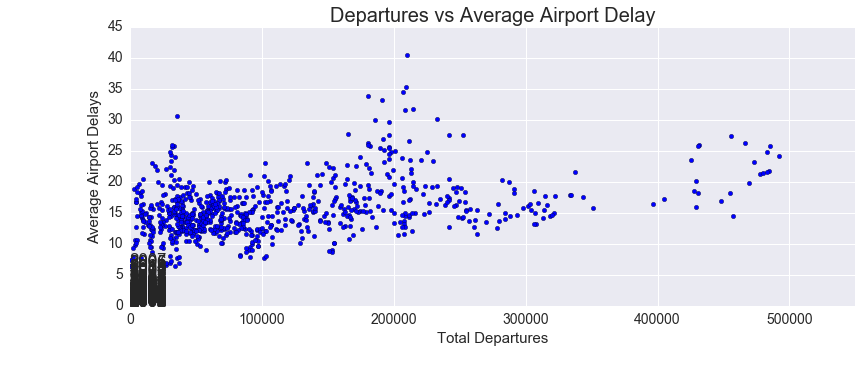

In [1199]:
#KIND OF RELATED??


plt.figure(figsize=(13,5))
plt.scatter(x=giant_data["departures for metric computation"], y=giant_data["average airport departure delay"])
for i, txt in enumerate(giant_data["year"]):
    plt.annotate(txt,(x[i],y[i]))
plt.title("Departures vs Average Airport Delay", size = 20)
plt.xlabel("Total Departures", size = 15)
plt.ylabel("Average Airport Delays", size = 15)
plt.ylim(0, 45)
plt.xlim(0, 550000)


plt.show()

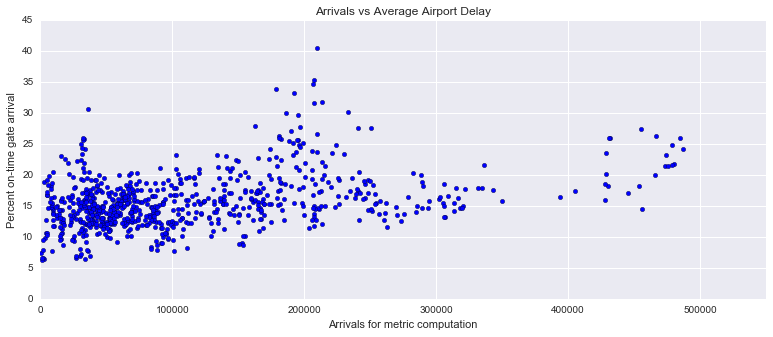

In [483]:
#ALSO KIND OF RELATED

plt.figure(figsize=(13,5))
plt.scatter(x=giant_data["arrivals for metric computation"], y=giant_data["average airport departure delay"])
plt.title("Arrivals vs Average Airport Delay")
plt.xlabel("Arrivals for metric computation")
plt.ylabel("Percent on-time gate arrival")
plt.ylim(0, 45)
plt.xlim(0, 550000)
plt.show()

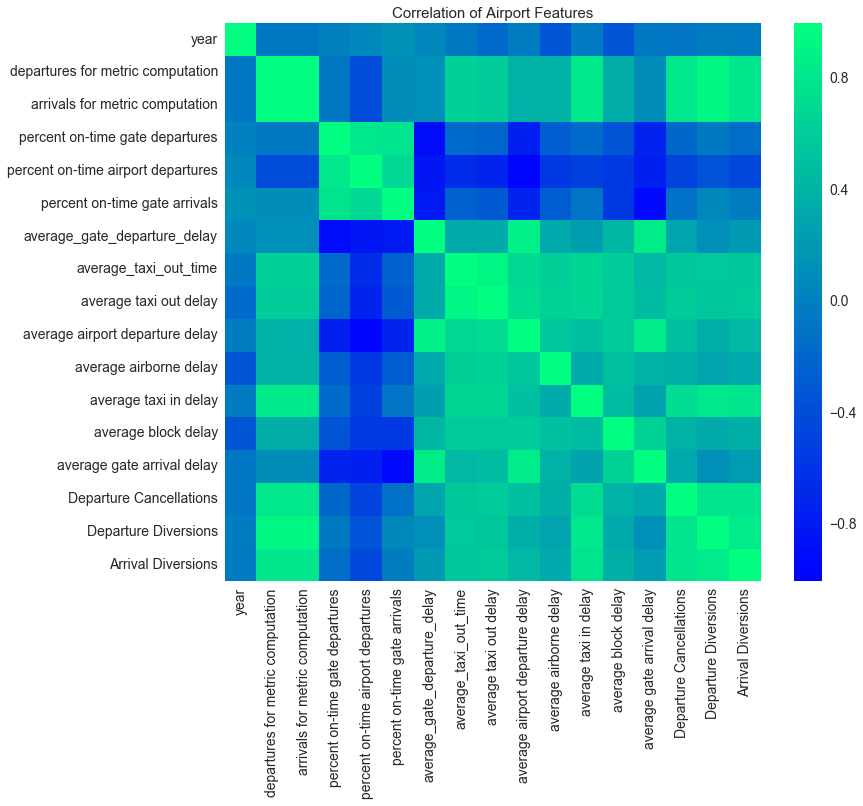

In [502]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(giant_data.corr(), cmap = "winter")

ax.axes.set_title("Correlation of Airport Features", size = 15)

plt.show()

#Many of the metrics (with the exception of )

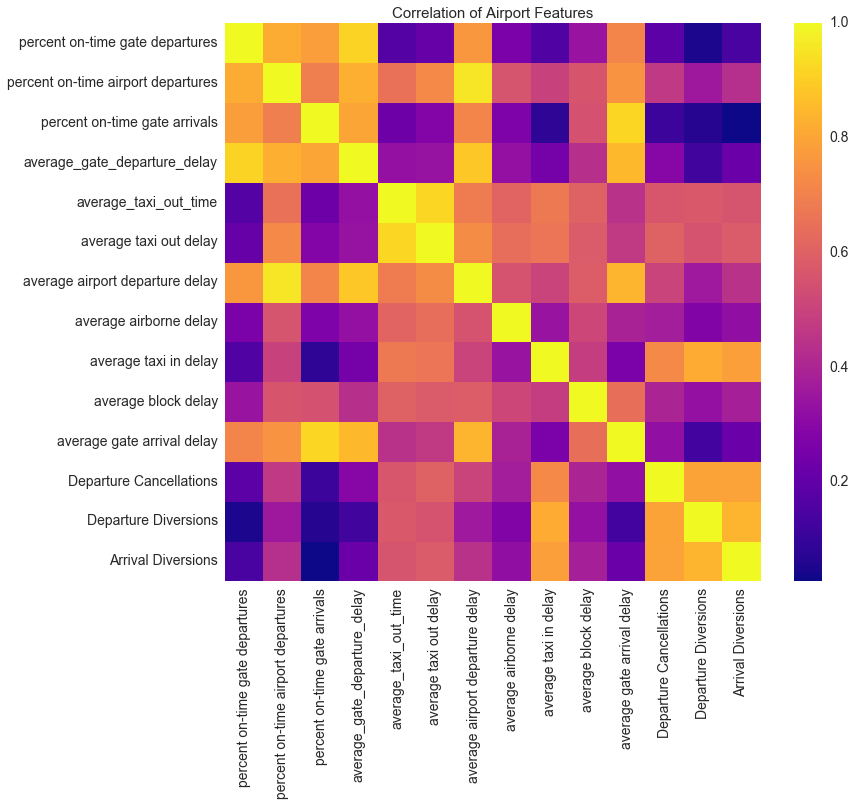

In [1018]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(X_delay.corr().applymap(lambda x: abs(x)), cmap = "plasma")

ax.axes.set_title("Correlation of Airport Features", size = 15)

plt.show()

#many of the metrics are correlated so PCA is necessary

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: PCA basically mushes together all of the features, so its important to know which features are correlated since the ones that are correlated will likely be reduced.

#### 4.4 Validate your findings using statistical analysis

In [ ]:
#see above??

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

In [525]:
covmat = np.cov(X_stand.T)
eigenValues, eigenVectors = np.linalg.eig(covmat)

In [526]:
print eigenValues

[  7.64282127e+00   3.14683883e+00   1.11133561e+00   6.38128341e-01
   4.54983632e-01   3.10642528e-01   1.80382664e-01   1.70927390e-01
   5.99795376e-02   1.50773012e-02   9.60075062e-04   4.84278797e-03
   1.42690530e-01   1.37933368e-01]


In [527]:
len(eigenValues)

14

In [529]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

#first 3 look good

7.64282126918
3.14683882689
1.11133560845
0.638128341489
0.454983632238
0.310642527827
0.180382663658
0.170927389669
0.142690530205
0.137933368216
0.0599795375673
0.0150773012332
0.0048427879733
0.000960075061511


In [530]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [531]:
cvarex = np.cumsum(varExpl)
print cvarex

[  54.52325561   76.97254386   84.9007203    89.45307517   92.69889082
   94.91498895   96.20182398   97.42120586   98.43914831   99.42315357
   99.85104263   99.95860285   99.9931509   100.        ]


In [1027]:
cvarex_list = cvarex.tolist()

In [1035]:
print cvarex_list

[54.523255612405386, 76.97254386428139, 84.90072029501054, 89.45307517171527, 92.698890820974, 94.91498895440898, 96.20182397675086, 97.42120585549384, 98.43914831127164, 99.42315356638117, 99.8510426328815, 99.95860285444499, 99.9931509038165, 100.0]


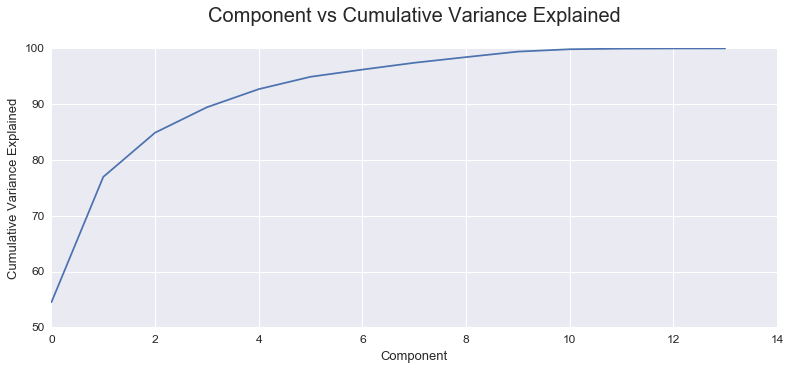

In [1040]:
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.set_ylabel('Cumulative Variance Explained', fontsize=13)
ax.set_xlabel('Component', fontsize=13)
ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
plt.plot(cvarex_list)

In [676]:
from sklearn.decomposition import PCA

airports_pca = PCA(n_components=3)
airports_pca.fit(X_stand)
X_PCA = airports_pca.transform(X_stand)

In [677]:
X_df_PCA = pd.DataFrame(X_PCA, columns=['PC1','PC2','PC3'])

In [678]:
print "max 1: ", max(X_df_PCA["PC1"])
print "min 1: ", min(X_df_PCA["PC1"])
print "max 2: ", max(X_df_PCA["PC2"])
print "min 2: ", min(X_df_PCA["PC2"])
print "max 3: ", max(X_df_PCA["PC3"])
print "mix 3: ", min(X_df_PCA["PC3"])

max 1:  13.4855242521
min 1:  -5.79115473161
max 2:  6.63611182475
min 2:  -5.83726200137
max 3:  3.72007334935
mix 3:  -4.73137261458


In [601]:
X_df_PCA.head(1)

PC1       PC2       PC3
0 -2.487385  0.076278  0.036366

In [603]:
giant_data.reset_index(inplace=True)

In [605]:
del giant_data["index"]

In [612]:
X_df_PCA.head()

PC1       PC2       PC3
0 -2.487385  0.076278  0.036366
1 -2.949253 -0.194709  0.017531
2 -2.189543  0.279556 -0.324838
3 -1.688051  0.323438 -0.181177
4 -2.355107  0.061881 -0.188308

In [598]:
del X_df_PCA[0]

In [611]:
X_df_PCA.reset_index(inplace = True)
del X_df_PCA["index"]

In [679]:
X_df_PCA = pd.concat([X_df_PCA, giant_data["airport"]], axis = 1)

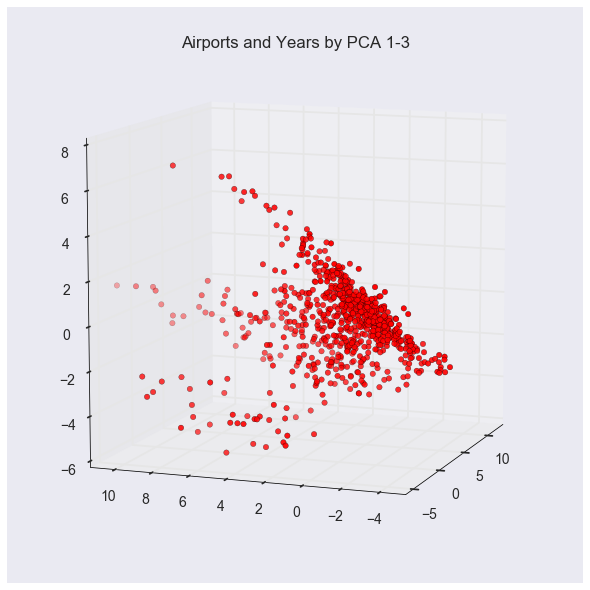

In [615]:
from mpl_toolkits.mplot3d import Axes3D
x = X_df_PCA["PC1"]
y= X_df_PCA["PC2"]
z=X_df_PCA["PC3"]


fig = plt.figure(figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x, y, z, zdir="x", c="red", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports and Years by PCA 1-3")
plt.show()

In [749]:
X_delay_pca = pd.concat([X_delay, X_df_PCA], axis =1)

In [760]:
X_delay_pca.columns[:13]

Index([u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Departure Diversions'],
      dtype='object')

In [997]:
pca_corr = X_delay_pca.corr().iloc[-3:].T

In [1005]:
pca_corr = pca_corr[:-3]

In [1015]:
pca_corr_test.sort_values("PC1", ascending = False, inplace = True)

In [1013]:
pca_corr.sort_values("PC1")

PC1       PC2       PC3
percent on-time airport departures -0.303690  0.088339  0.008673
percent on-time gate departures    -0.261661 -0.069826  0.109107
percent on-time gate arrivals      -0.194523 -0.102029 -0.096919
average airborne delay              0.102865 -0.105216  0.272514
average_taxi_out_time               0.176739 -0.274934  0.118915
Departure Cancellations             0.193310 -0.313454 -0.066912
average block delay                 0.194416 -0.070173  0.200832
average gate arrival delay          0.213067  0.044427  0.099373
average taxi out delay              0.220842 -0.236109  0.113830
Departure Diversions                0.240057 -0.391886 -0.118668
Arrival Diversions                  0.251754 -0.344873 -0.223502
average_gate_departure_delay        0.273582  0.046101 -0.088581
average taxi in delay               0.279576 -0.303689 -0.103068
average airport departure delay     0.304595 -0.084623 -0.011553

In [1016]:
pca_corr_test

PC1       PC2       PC3
average airport departure delay     0.304595  0.084623  0.011553
percent on-time airport departures  0.303690  0.088339  0.008673
average taxi in delay               0.279576  0.303689  0.103068
average_gate_departure_delay        0.273582  0.046101  0.088581
percent on-time gate departures     0.261661  0.069826  0.109107
Arrival Diversions                  0.251754  0.344873  0.223502
Departure Diversions                0.240057  0.391886  0.118668
average taxi out delay              0.220842  0.236109  0.113830
average gate arrival delay          0.213067  0.044427  0.099373
percent on-time gate arrivals       0.194523  0.102029  0.096919
average block delay                 0.194416  0.070173  0.200832
Departure Cancellations             0.193310  0.313454  0.066912
average_taxi_out_time               0.176739  0.274934  0.118915
average airborne delay              0.102865  0.105216  0.272514

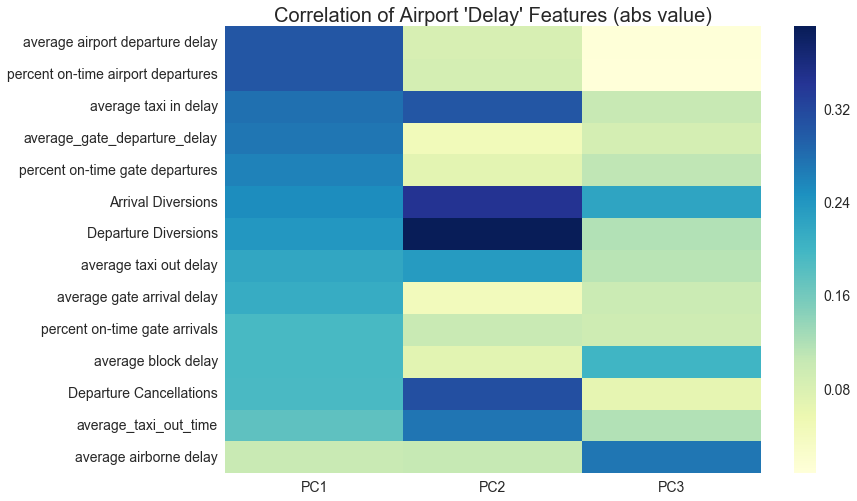

In [1043]:

plt.figure(figsize=(12,8))
#sns.set(font_scale=1.5)
ax = sns.heatmap(pca_corr_test, cmap = "YlGnBu")

ax.axes.set_title("Correlation of Airport 'Delay' Features (abs value)", size = 20)

plt.show()

#Focus on PC1, PC2, PC3 see theres not huge correlations for specific features - pretty much the same throughout. 
#

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

run cluster dbscan - experimented with a few eps and min_samples

In [789]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#run fake gridsearchcv 
eps = [.3, .5, .75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 7, 8]
min_samples = [4, 5, 8, 10, 15, 20, 25, 35, 40, 50]

for i in eps:
    for a in min_samples:
        db = DBSCAN(eps=i, min_samples=a)
        db.fit(X_stand)
        labels = db.labels_
        if len(np.unique(labels)) >1:
            xs = silhouette_score(X_stand, labels)
            print i, a, np.unique(labels), xs

0.5 4 [-1  0  1  2  3] -0.354467698763
0.5 5 [-1  0  1] -0.354928590952
0.75 4 [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] -0.329404510973
0.75 5 [-1  0  1  2  3  4  5  6] -0.297581517969
0.75 8 [-1  0  1  2] -0.279105941018
0.75 10 [-1  0  1] -0.247312779515
0.75 15 [-1  0  1] -0.274985664046
1 4 [-1  0  1  2  3  4  5  6  7  8  9 10 11] -0.230835714668
1 5 [-1  0  1  2  3] -0.150402477295
1 8 [-1  0  1] -0.0597417577338
1 10 [-1  0] 0.0950514359286
1 15 [-1  0] 0.0646161435995
1 20 [-1  0] 0.0167623929928
1 25 [-1  0] -0.014578892219
1 35 [-1  0] -0.0700210250608
1 40 [-1  0] -0.107911531823
1.5 4 [-1  0  1  2  3] 0.0616779013474
1.5 5 [-1  0  1  2  3] 0.131227574294
1.5 8 [-1  0] 0.353260377166
1.5 10 [-1  0] 0.329649460228
1.5 15 [-1  0] 0.274151803794
1.5 20 [-1  0] 0.254805120371
1.5 25 [-1  0] 0.235559562402
1.5 35 [-1  0] 0.219457656744
1.5 40 [-1  0] 0.217642610468
1.5 50 [-1  0] 0.207355986276
2 4 [-1  0  1  2  3] 0.338191894639
2 5 [-1  0  1  2  3  4] 0.329015158793
2 8

In [784]:
#best silhouette score result was eps = 5, min_samples of 25, but with only one cluster, and the rest as noise

db = DBSCAN(eps=5, min_samples=25)
db.fit(X_stand)
core_samples = db.core_sample_indices_
labels = db.labels_

print silhouette_score(X_stand, labels)

0.634869433848


In [730]:
print np.unique(labels)

[-1  0]


In [731]:
labels_s = pd.Series(labels)

In [732]:
labels_s.value_counts()
#only 2 clusters

 0    797
-1      2
dtype: int64

In [733]:
X_dbscan = pd.concat([X_df_PCA, labels_s], axis = 1)

In [735]:
X_dbscan.sort_values(0, inplace = True)

In [738]:
X_dbscan.head()

index        PC1       PC2       PC3 airport  0
0    531   9.488359 -2.504636 -3.541587     ORD -1
1    333  13.485524  0.493186  3.720073     JFK -1
2      2  -2.189543  0.279556 -0.324838     ABQ  0
3      3  -1.688051  0.323438 -0.181177     ABQ  0
4      4  -2.355107  0.061881 -0.188308     ABQ  0

In [737]:
X_dbscan.reset_index(inplace = True)

In [739]:
X_dbscan.head()

del X_dbscan["index"]

In [698]:
X_dbscan.head()

PC1       PC2       PC3 airport  0
0   0.890149 -4.860765 -1.452163     ATL -1
1  11.097939  0.666535  2.786438     LGA -1
2  11.730782  0.772470  1.870724     EWR -1
3  10.702476 -0.145383  2.968994     EWR -1
4   5.707376 -2.498431 -3.801222     ORD -1

In [740]:
X_dbscan[0].value_counts()

 0    797
-1      2
Name: 0, dtype: int64

In [745]:
X_dbscan.iloc[2:5]

PC1       PC2       PC3 airport  0
2 -2.189543  0.279556 -0.324838     ABQ  0
3 -1.688051  0.323438 -0.181177     ABQ  0
4 -2.355107  0.061881 -0.188308     ABQ  0

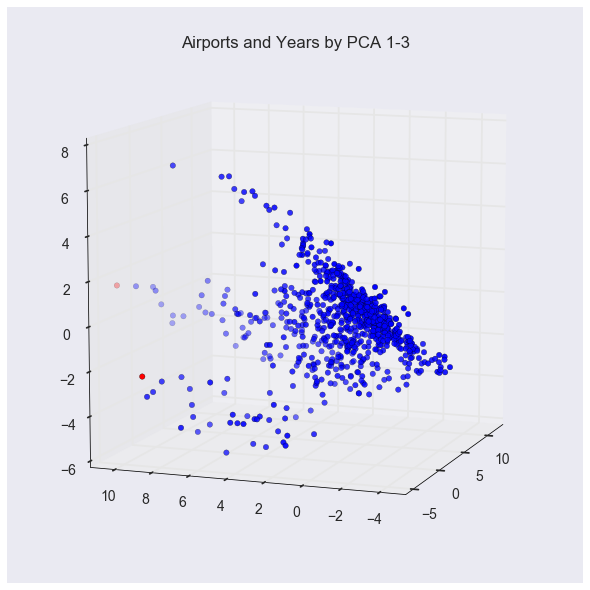

In [790]:
x1 = X_dbscan.iloc[:2].PC1
y1 = X_dbscan.iloc[:2].PC2
z1 = X_dbscan.iloc[:2].PC3

x2 = X_dbscan.iloc[2:].PC1
y2 = X_dbscan.iloc[2:].PC2
z2 = X_dbscan.iloc[2:].PC3



fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x1, y1, z1, zdir="x", c="red", s=30)
ax.scatter(x2, y2, z2, zdir="x", c="blue", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports and Years by PCA 1-3")
plt.show()

#RED IS THE NOISE, BLUE IS THE CLUSTER

In [792]:
#try with another ep / min_sample combo to produce more than one cluster since these doesn't look visually correct

db_2 = DBSCAN(eps=3, min_samples=4)
db_2.fit(X_stand)
core_samples_2 = db.core_sample_indices_
labels_2 = db_2.labels_

print silhouette_score(X_stand, labels_2)

0.563527145013


In [793]:
labels_s_2 = pd.Series(labels_2)
X_dbscan_2 = pd.concat([X_df_PCA, labels_s_2], axis = 1)
X_dbscan_2.head()


PC1       PC2       PC3 airport  0
0 -2.487385  0.076278  0.036366     ABQ  0
1 -2.949253 -0.194709  0.017531     ABQ  0
2 -2.189543  0.279556 -0.324838     ABQ  0
3 -1.688051  0.323438 -0.181177     ABQ  0
4 -2.355107  0.061881 -0.188308     ABQ  0

In [794]:
X_dbscan_2.sort_values(0, inplace = True)
X_dbscan_2.reset_index(inplace = True)
X_dbscan_2.head()

index        PC1       PC2       PC3 airport  0
0    201   6.982533 -4.472562 -4.731373     DFW -1
1    267   8.836600  6.636112 -0.366789     HPN -1
2    538   8.955640 -3.270471 -4.324684     ORD -1
3    333  13.485524  0.493186  3.720073     JFK -1
4      0  -2.487385  0.076278  0.036366     ABQ  0

In [796]:
del X_dbscan_2['index']
X_dbscan_2[0].value_counts()

 0    790
 1      5
-1      4
Name: 0, dtype: int64

In [806]:
X_dbscan_2.iloc[794:]

PC1       PC2       PC3 airport  0
794  8.866608 -3.148947 -3.642358     ORD  1
795  9.488359 -2.504636 -3.541587     ORD  1
796  8.560112 -2.729012 -3.147777     ORD  1
797  7.886999 -2.652870 -1.975244     ORD  1
798  6.956806 -4.268280 -2.870868     ATL  1

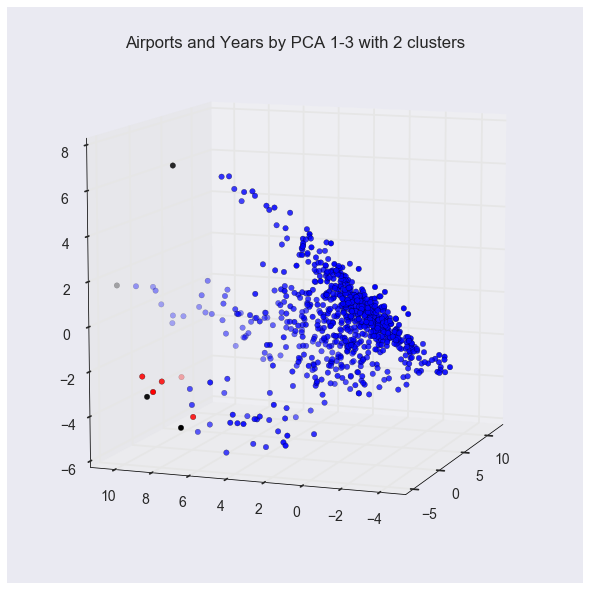

In [807]:
x1 = X_dbscan_2.iloc[:4].PC1
y1 = X_dbscan_2.iloc[:4].PC2
z1 = X_dbscan_2.iloc[:4].PC3

x2 = X_dbscan_2.iloc[4:794].PC1
y2 = X_dbscan_2.iloc[4:794].PC2
z2 = X_dbscan_2.iloc[4:794].PC3

x3 = X_dbscan_2.iloc[794:].PC1
y3 = X_dbscan_2.iloc[794:].PC2
z3 = X_dbscan_2.iloc[794:].PC3



fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x1, y1, z1, zdir="x", c="black", s=30)
ax.scatter(x2, y2, z2, zdir="x", c="blue", s=30)
ax.scatter(x3, y3, z3, zdir="x", c="red", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports and Years by PCA 1-3 with 2 clusters")
plt.show()

#not much of a difference - move on to another thing

run cluster hierarchical pairing

In [812]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [826]:
hier_comp = linkage(X_stand, 'complete')


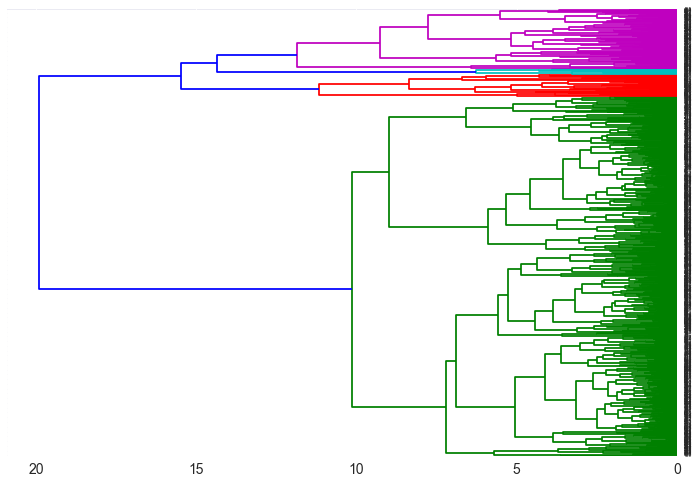

In [827]:

fig, ax = plt.subplots(figsize=(12,8))
dn = dendrogram(hier_comp, orientation='left', labels=X.index)

#potentially 2 or 3 clusters form complete

In [841]:
#try 2
max_dist_2 = 17
clusters_2 = fcluster(hier_comp, max_dist_2, criterion='distance')
np.unique(clusters_2)

array([1, 2], dtype=int32)

In [842]:
#NOT AS GOOD AS DBSCAN BUT WORKING THE BEST SO FAR
print silhouette_score(X_stand, clusters_2)

0.437036955877


In [845]:
#try 3
max_dist_3 = 15
clusters_3 = fcluster(hier_comp, max_dist_3, criterion='distance')
np.unique(clusters_3)

array([1, 2, 3], dtype=int32)

In [846]:
print silhouette_score(X_stand, clusters_3)

0.426987990787


In [847]:
#try 4
max_dist_4 = 12
clusters_4 = fcluster(hier_comp, max_dist_4, criterion='distance')
np.unique(clusters_4)

array([1, 2, 3, 4], dtype=int32)

In [848]:
print silhouette_score(X_stand, clusters_4)

0.396504879867


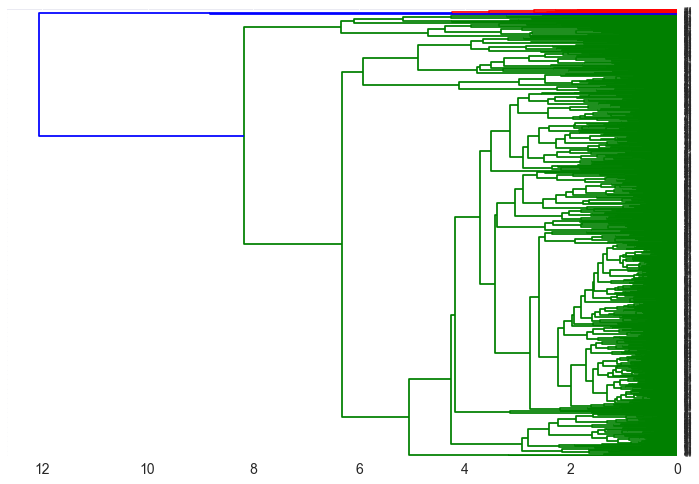

In [851]:
hier_avg = linkage(X_stand, 'average')

fig, ax = plt.subplots(figsize=(12,8))
dn = dendrogram(hier_avg, orientation='left', labels=X.index)

#weird

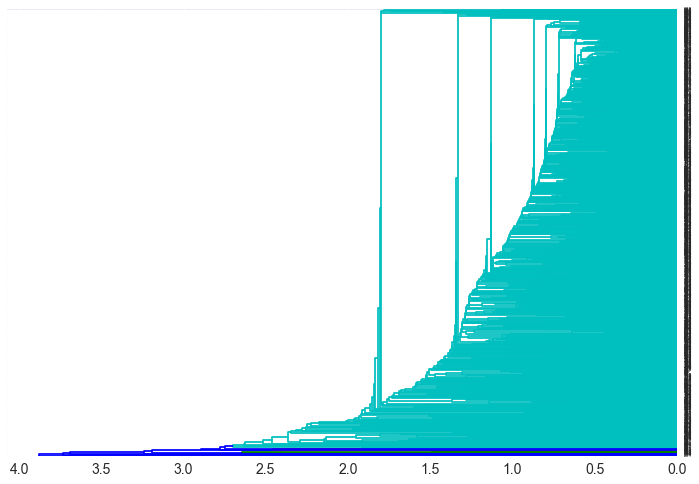

In [852]:
hier_sig = linkage(X_stand, 'single')

fig, ax = plt.subplots(figsize=(12,8))
dn = dendrogram(hier_sig, orientation='left', labels=X.index)

#also weird

In [855]:
#try graph
clusters_2_s = pd.Series(clusters_2)
X_clusters_2 = pd.concat([X_df_PCA, clusters_2_s], axis = 1)

X_clusters_2.sort_values(0, inplace = True)
X_clusters_2.reset_index(inplace = True)

del X_clusters_2["index"]

X_clusters_2.head()

PC1       PC2       PC3 airport  0
0 -2.487385  0.076278  0.036366     ABQ  1
1 -5.127429 -1.947884  0.883993     OGG  1
2 -5.438212 -1.985641  0.620304     OGG  1
3 -5.093184 -1.954863  0.392986     OGG  1
4 -4.644771 -1.589988  0.243680     OGG  1

In [857]:
X_clusters_2[0].value_counts()

1    644
2    155
Name: 0, dtype: int64

In [862]:
X_clusters_2.iloc[645:]

PC1       PC2       PC3 airport  0
645   2.554509 -0.073038 -0.265400     SFO  2
646   5.923448 -0.861587  2.238148     LGA  2
647   4.403576  0.239013 -1.189274     SFO  2
648   3.821651 -2.002309  2.174387     LGA  2
649   3.142934 -0.538328  1.019334     BOS  2
650   2.572792 -0.641330 -1.256998     SFO  2
651   3.109407 -0.288211  1.062032     BOS  2
652   4.236483  0.081573  0.936027     BOS  2
653   3.946849 -0.044198 -0.980911     SFO  2
654   1.802123  2.904729  0.370584     ANC  2
655  11.097939  0.666535  2.786438     LGA  2
656   9.512644 -0.649149  3.122745     LGA  2
657   2.953976 -0.620089  1.243562     BOS  2
658   5.443926 -1.017791  1.746303     LGA  2
659   4.415081 -2.069450  2.152369     LGA  2
660   6.837267 -0.493408  1.646716     LGA  2
661   2.252740 -0.678077  0.840554     BOS  2
662   8.088037 -0.326104  2.562233     LGA  2
663   3.462616  4.125010  0.386355     ANC  2
664   2.645624  4.750554  0.096352     SWF  2
665   1.245731  3.033233  0.675407     SWF  2
666   7.539187 -0.289540  1.979100     JFK  2
667   4.043464 -0.553494  1.559793     JFK  2
668  10.034696 -0.619269  2.921172     JFK  2
669  13.485524  0.493186  3.720073     JFK  2
670   2.645860  0.327503 -0.563960     SFO  2
671  10.156054 -1.013312  3.170282     JFK  2
672   6.615915 -1.865658  3.177986     JFK  2
673   6.636458 -1.091558  1.609228     JFK  2
674   5.217057 -0.453948  1.503759     JFK  2
..         ...       ...       ...     ... ..
769   2.598825  1.129493 -0.727325     MIA  2
770   2.153241  0.958003  0.236215     SFO  2
771   3.392232  0.138483  1.010187     IAD  2
772   4.808118  5.671649 -0.857631     HPN  2
773   4.314306  5.740316 -1.001341     HPN  2
774   3.160445  5.063050 -0.930877     HPN  2
775   8.063192  0.552507  1.883213     EWR  2
776   4.642112 -0.127082  0.620369     EWR  2
777   6.457229  0.409485  0.666046     EWR  2
778   5.604305  0.281369  0.041848     EWR  2
779   5.383633  0.140980 -0.344749     EWR  2
780   5.325401  0.113225 -0.279422     EWR  2
781   2.663552  1.363179  0.372014     FLL  2
782   1.568569  1.260405 -0.151852     FLL  2
783   1.718635  0.930276  0.228620     FLL  2
784   1.697967  1.233478 -0.199107     FLL  2
785   7.886999 -2.652870 -1.975244     ORD  2
786   1.459310  1.280681 -0.390489     FLL  2
787   5.652734  6.322764 -0.748827     HPN  2
788   2.164392 -1.352482  1.328613     CLT  2
789   3.420909 -0.123055  1.075014     CLT  2
790   1.972264 -1.219543  1.884101     CLT  2
791   6.057175  6.289503 -0.748775     HPN  2
792   8.836600  6.636112 -0.366789     HPN  2
793   5.536408  5.717440 -0.249499     HPN  2
794   3.564574  4.901433 -0.533143     HPN  2
795   3.681883  5.093494 -0.643056     HPN  2
796   4.258499  5.518093 -0.757109     HPN  2
797   5.304884  5.132252  0.250093     HPN  2
798   4.826329 -2.257834  2.355210     LGA  2

[154 rows x 5 columns]

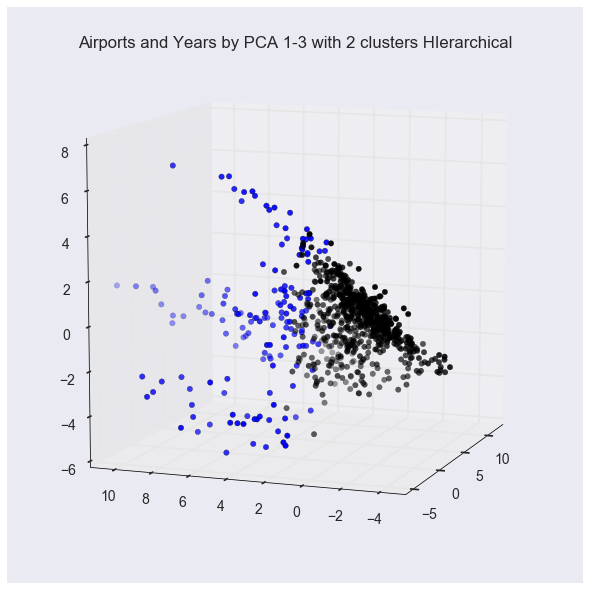

In [863]:
x1 = X_clusters_2.iloc[:644].PC1
y1 = X_clusters_2.iloc[:644].PC2
z1 = X_clusters_2.iloc[:644].PC3

x2 = X_clusters_2.iloc[645:].PC1
y2 = X_clusters_2.iloc[645:].PC2
z2 = X_clusters_2.iloc[645:].PC3


fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x1, y1, z1, zdir="x", c="black", s=30)
ax.scatter(x2, y2, z2, zdir="x", c="blue", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports and Years by PCA 1-3 with 2 clusters Hierarchical")
plt.show()


try kmeans clustering

In [864]:
from sklearn import cluster, metrics


k = [2,3,4]
for i in k:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_stand)
    labels = kmeans.labels_
    print i, silhouette_score(X_stand, labels)
    
#2 clusters performs best at slightly higher rates than hierarchical

2 0.447550752531
3 0.258000611281
4 0.269688026404


In [865]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X_stand)
labels_k = kmeans.labels_
print silhouette_score(X_stand, labels_k)

0.447550752531


In [866]:
k_2_s = pd.Series(labels_k)
X_k_2 = pd.concat([X_df_PCA, k_2_s], axis = 1)

X_k_2.sort_values(0, inplace = True)
X_k_2.reset_index(inplace = True)

del X_k_2["index"]

In [868]:
X_k_2[0].value_counts()

0    649
1    150
Name: 0, dtype: int64

In [871]:
X_k_2.iloc[649:]

PC1       PC2       PC3 airport  0
649   2.182609 -0.440757 -0.476979     LAS  1
650   1.752566 -0.655372 -0.629469     LAS  1
651   2.012033 -0.180637 -0.554120     LAS  1
652   4.794052 -0.433332  2.977272     PHL  1
653   2.125726  1.150666 -0.180040     MDW  1
654   2.297813  1.237333 -0.275514     MDW  1
655   2.681096 -0.787302  2.284748     PHL  1
656   4.947733 -0.257963  1.343450     JFK  1
657   4.482944 -0.240511  1.520169     JFK  1
658   2.868907 -0.895832  1.563713     JFK  1
659   5.217057 -0.453948  1.503759     JFK  1
660   2.305167  1.523663 -1.942666     MDW  1
661   3.952086  1.277929 -1.707458     MDW  1
662   7.539187 -0.289540  1.979100     JFK  1
663   6.615915 -1.865658  3.177986     JFK  1
664   4.338779 -4.278607 -3.529975     DFW  1
665   3.491951 -4.071641 -3.305754     DFW  1
666   1.676729 -1.448586 -0.647113     PHX  1
667   1.917429 -4.989331 -3.421884     DFW  1
668   1.713125 -5.076825 -3.710413     DFW  1
669   1.727230 -4.685259 -3.361650     DFW  1
670   2.384290  0.162817  1.364435     PHL  1
671   6.636458 -1.091558  1.609228     JFK  1
672   2.232962  0.211345  1.552899     PHL  1
673   3.798693  0.442134  1.726988     PHL  1
674   4.043464 -0.553494  1.559793     JFK  1
675   4.839637 -0.173904  2.722010     PHL  1
676  10.034696 -0.619269  2.921172     JFK  1
677  13.485524  0.493186  3.720073     JFK  1
678   2.165124 -0.120730  1.045269     MEM  1
..         ...       ...       ...     ... ..
769   2.252740 -0.678077  0.840554     BOS  1
770   3.905869  2.463653 -0.551134     MIA  1
771   3.067299  2.304384 -1.129424     MIA  1
772   4.236483  0.081573  0.936027     BOS  1
773   3.109407 -0.288211  1.062032     BOS  1
774   3.142934 -0.538328  1.019334     BOS  1
775   3.019029 -0.884102 -2.181697     DEN  1
776   2.598825  1.129493 -0.727325     MIA  1
777   3.228632 -0.918767 -2.039726     DEN  1
778   1.692222 -2.469670 -0.067415     DEN  1
779   3.015711 -1.875499 -1.701170     IAH  1
780   2.134469 -1.777191  0.156054     DEN  1
781   2.572792 -0.641330 -1.256998     SFO  1
782   4.250446 -1.717785  0.803594     MSP  1
783   2.585701 -3.429960 -2.919876     ORD  1
784   2.470556 -1.364591  1.136100     MSP  1
785   5.707376 -2.498431 -3.801222     ORD  1
786   8.955640 -3.270471 -4.324684     ORD  1
787   2.663552  1.363179  0.372014     FLL  1
788   5.325401  0.113225 -0.279422     EWR  1
789   5.383633  0.140980 -0.344749     EWR  1
790   2.153241  0.958003  0.236215     SFO  1
791   3.029453  0.721183  0.282446     SFO  1
792   3.147005  0.602711  0.010486     SFO  1
793   2.880835 -1.285749  0.124919     DEN  1
794   2.645860  0.327503 -0.563960     SFO  1
795   2.554509 -0.073038 -0.265400     SFO  1
796   4.403576  0.239013 -1.189274     SFO  1
797   3.946849 -0.044198 -0.980911     SFO  1
798   2.639590 -4.761430 -2.028015     DFW  1

[150 rows x 5 columns]

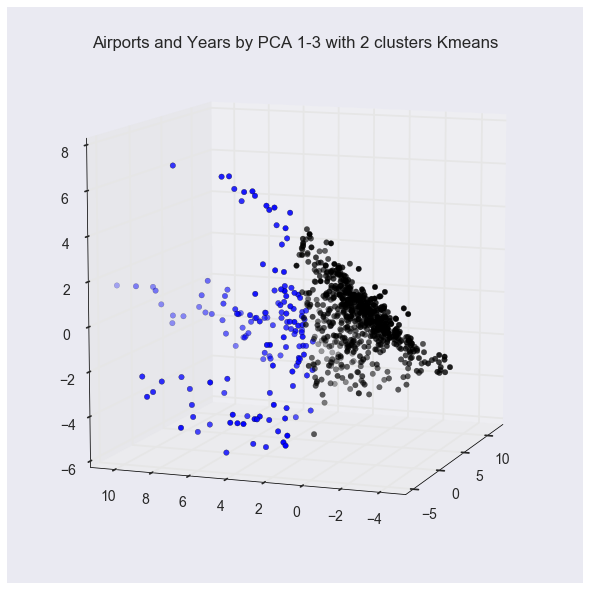

In [872]:
x1 = X_k_2.iloc[:649].PC1
y1 = X_k_2.iloc[:649].PC2
z1 = X_k_2.iloc[:649].PC3

x2 = X_k_2.iloc[649:].PC1
y2 = X_k_2.iloc[649:].PC2
z2 = X_k_2.iloc[649:].PC3


fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, elev=10, azim=200)
ax.scatter(x1, y1, z1, zdir="x", c="black", s=30)
ax.scatter(x2, y2, z2, zdir="x", c="blue", s=30)
ax.set_xlim3d(-6, 13)
ax.set_ylim3d(-5,11)
ax.set_zlim3d(-6,8)
plt.title("Airports & Years by PCA 1-3 with 2 Clusters Kmeans")
plt.show()
#FINAL ANALYSIS

Begin to reappend final clustering to begin analysis

In [873]:
giant_data.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay         ...          average taxi in delay  \
0                    2.43         ...                           0.83   
1                    2.29         ...                           0.89   
2                    2.16         ...                           0.84   
3                    2.40         ...                           1.29   
4                    2.41         ...                           1.03   

   average block delay  average gate arrival delay  FAA REGION      COUNTY  \
0                 2.55                       10.87         ASW  BERNALILLO   
1                 2.34                       10.24         ASW  BERNALILLO   
2                 2.66                       11.82         ASW  BERNALILLO   
3                 3.06                       12.71         ASW  BERNALILLO   
4                 2.79                       11.48         ASW  BERNALILLO   

          CITY STATE Departure Cancellations Departure Diversions  \
0  ALBUQUERQUE    NM                   242.0                 71.0   
1  ALBUQUERQUE    NM                   221.0                 61.0   
2  ALBUQUERQUE    NM                   392.0                 71.0   
3  ALBUQUERQUE    NM                   366.0                107.0   
4  ALBUQUERQUE    NM                   333.0                 79.0   

   Arrival Diversions  
0                46.0  
1                33.0  
2               124.0  
3                45.0  
4                42.0  

[5 rows x 22 columns]

In [874]:
X.head()

percent on-time gate departures  percent on-time airport departures  \
0                           0.8030                              0.7809   
1                           0.8140                              0.7922   
2                           0.7983                              0.7756   
3                           0.8005                              0.7704   
4                           0.8103                              0.7844   

   percent on-time gate arrivals  average_gate_departure_delay  \
0                         0.7921                         10.38   
1                         0.8001                          9.60   
2                         0.7746                         10.84   
3                         0.7647                         11.29   
4                         0.7875                         10.79   

   average_taxi_out_time  average taxi out delay  \
0                   9.89                    2.43   
1                   9.79                    2.29   
2                   9.89                    2.16   
3                  10.34                    2.40   
4                  10.41                    2.41   

   average airport departure delay  average airborne delay  \
0                            12.10                    2.46   
1                            11.20                    2.26   
2                            12.33                    2.12   
3                            12.95                    2.19   
4                            12.32                    1.82   

   average taxi in delay  average block delay  average gate arrival delay  \
0                   0.83                 2.55                       10.87   
1                   0.89                 2.34                       10.24   
2                   0.84                 2.66                       11.82   
3                   1.29                 3.06                       12.71   
4                   1.03                 2.79                       11.48   

   Departure Cancellations  Departure Diversions  Arrival Diversions  
0                    242.0                  71.0                46.0  
1                    221.0                  61.0                33.0  
2                    392.0                  71.0               124.0  
3                    366.0                 107.0                45.0  
4                    333.0                  79.0                42.0

In [910]:
not_y = giant_data

In [880]:
X.columns

Index([u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [894]:
for i in X.columns:
    del not_y[i]

KeyError: 'percent on-time gate departures'

In [905]:
not_y.tail()

airport  year  departures for metric computation  \
794     TUS  2010                              24995   
795     TUS  2011                              25149   
796     TUS  2012                              23583   
797     TUS  2013                              22502   
798     TUS  2014                              22589   

     arrivals for metric computation FAA REGION COUNTY    CITY STATE  
794                            25088        AWP   PIMA  TUCSON    AZ  
795                            25165        AWP   PIMA  TUCSON    AZ  
796                            23679        AWP   PIMA  TUCSON    AZ  
797                            22090        AWP   PIMA  TUCSON    AZ  
798                            22340        AWP   PIMA  TUCSON    AZ

In [897]:
X_k_3 = pd.concat([X_df_PCA, k_2_s], axis = 1)

In [911]:
not_y = pd.concat([not_y, X_k_3[0]], axis = 1)

In [891]:
#make sure everything concated correctly

In [912]:
not_y.tail()

airport  year  departures for metric computation  \
794     TUS  2010                              24995   
795     TUS  2011                              25149   
796     TUS  2012                              23583   
797     TUS  2013                              22502   
798     TUS  2014                              22589   

     arrivals for metric computation FAA REGION COUNTY    CITY STATE  0  
794                            25088        AWP   PIMA  TUCSON    AZ  0  
795                            25165        AWP   PIMA  TUCSON    AZ  0  
796                            23679        AWP   PIMA  TUCSON    AZ  0  
797                            22090        AWP   PIMA  TUCSON    AZ  0  
798                            22340        AWP   PIMA  TUCSON    AZ  0

In [913]:
not_y.sort_values(0)

airport  year  departures for metric computation  \
0       ABQ  2004                              53971   
509     OMA  2007                              41352   
510     OMA  2008                              39881   
511     OMA  2009                              36834   
512     OMA  2010                              38331   
513     OMA  2011                              37305   
514     OMA  2012                              35067   
515     OMA  2013                              33253   
516     OMA  2014                              33241   
517     ONT  2004                              54166   
518     ONT  2005                              54110   
519     ONT  2006                              53893   
520     ONT  2007                              59098   
521     ONT  2008                              51391   
522     ONT  2009                              40278   
523     ONT  2010                              37332   
524     ONT  2011                              35796   
525     ONT  2012                              33371   
526     ONT  2013                              32031   
527     ONT  2014                              32791   
508     OMA  2006                              39777   
507     OMA  2005                              40412   
506     OMA  2004                               9769   
505     OGG  2014                              34163   
485     OAK  2005                              96605   
486     OAK  2006                              98253   
487     OAK  2007                             100168   
488     OAK  2008                              87634   
489     OAK  2009                              69111   
490     OAK  2010                              65832   
..      ...   ...                                ...   
84      BOS  2011                             168358   
444     MIA  2008                             148383   
443     MIA  2007                             153621   
80      BOS  2007                             183078   
79      BOS  2006                             187003   
78      BOS  2005                             190420   
196     DEN  2013                             287348   
441     MIA  2005                             153661   
197     DEN  2014                             281772   
192     DEN  2009                             302078   
296     IAH  2014                             245284   
191     DEN  2008                             309021   
701     SFO  2013                             198131   
465     MSP  2007                             214837   
536     ORD  2012                             427374   
463     MSP  2005                             250633   
537     ORD  2013                             425352   
538     ORD  2014                             430429   
232     FLL  2005                             121481   
230     EWR  2014                             189545   
229     EWR  2013                             196365   
694     SFO  2006                             166306   
695     SFO  2007                             174691   
696     SFO  2008                             180476   
190     DEN  2007                             306308   
698     SFO  2010                             181495   
699     SFO  2011                             189552   
700     SFO  2012                             199751   
702     SFO  2014                             206374   
199     DFW  2005                             350842   

     arrivals for metric computation FAA REGION          COUNTY  \
0                              53818        ASW      BERNALILLO   
509                            41570        ACE         DOUGLAS   
510                            39850        ACE         DOUGLAS   
511                            36758        ACE         DOUGLAS   
512                            38386        ACE         DOUGLAS   
513                            37502        ACE         DOUGLAS   
514                            35288        ACE         DOUGLA

In [916]:
not_y.head(1)

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   

   arrivals for metric computation FAA REGION      COUNTY         CITY STATE  \
0                            53818        ASW  BERNALILLO  ALBUQUERQUE    NM   

   0  
0  0

In [922]:
not_y.rename(columns = {0: "label"}, inplace = True)

In [929]:
not_y.sort_values("label", inplace = True)
not_y.reset_index(inplace = True)

not_y.head()

index airport  year  departures for metric computation  \
0      0     ABQ  2004                              53971   
1    187     DEN  2004                             278131   
2    178     DCA  2006                             137261   
3    188     DEN  2005                             279946   
4    193     DEN  2010                             313514   

   arrivals for metric computation FAA REGION      COUNTY         CITY STATE  \
0                            53818        ASW  BERNALILLO  ALBUQUERQUE    NM   
1                           273449        ANM      DENVER       DENVER    CO   
2                           137325        AEA   ARLINGTON   WASHINGTON    DC   
3                           275578        ANM      DENVER       DENVER    CO   
4                           313279        ANM      DENVER       DENVER    CO   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [930]:
del not_y["index"]
not_y["label"].value_counts()

0    649
1    150
Name: label, dtype: int64

In [948]:
del not_y["arrivals for metric computation"]

#its one to one with departures so weonly need one

In [945]:
not_y["COUNTY"].unique()

array([u'BERNALILLO', u'DENVER', u'ARLINGTON', u'LOS ANGELES', u'WAYNE',
       u'MONTGOMERY', u'DALLAS', u'ANNE ARUNDEL', u'CUYAHOGA', u'BOONE',
       u'TRAVIS', u'HARTFORD', u'KING', u'SAN MATEO', u'JEFFERSON',
       u'BEXAR', u'SAN DIEGO', u'LEE', u'MECKLENBURG', u'ORANGE',
       u'FULTON', u'ANCHORAGE', u'HONOLULU', u'SUFFOLK', u'CLARK',
       u'LOUDOUN', u'MARION', u'HARRIS', u'BROWARD', u'DUVAL', u'ERIE',
       u'KENT', u'DAVIDSON', u'PIMA', u'WAKE', u'COOK', u'SHELBY',
       u'PALM BEACH', u'MULTNOMAH', u'ALLEGHENY', u'HENNEPIN',
       u'MILWAUKEE', u'HILLSBOROUGH', u'PLATTE', u'VENTURA', u'DOUGLAS',
       u'MAUI', u'ALAMEDA', u'SAN BERNARDINO', u'PHILADELPHIA',
       u'MARICOPA', u'ST LOUIS CITY', u'SANTA CLARA', u'RIVERSIDE',
       u'WINNEBAGO', u'DADE', u'SALT LAKE', u'SACRAMENTO', 'PR',
       u'WESTCHESTER', u'ESSEX', u'TARRANT', u'QUEENS'], dtype=object)

In [949]:
#try tree classification with county only and departures as continuous

county_dum = pd.get_dummies(not_y["COUNTY"])
state_dum = pd.get_dummies(not_y["STATE"])
faa_dum = pd.get_dummies(not_y["FAA REGION"])

not_x_ct = pd.concat([not_y, county_dum, state_dum, faa_dum], axis = 1)

In [961]:
boops = -1
for i in not_x_ct.columns:
    boops += 1
    print i, boops

airport 0
year 1
departures for metric computation 2
FAA REGION 3
COUNTY 4
CITY 5
STATE 6
label 7
ALAMEDA 8
ALLEGHENY 9
ANCHORAGE 10
ANNE ARUNDEL 11
ARLINGTON 12
BERNALILLO 13
BEXAR 14
BOONE 15
BROWARD 16
CLARK 17
COOK 18
CUYAHOGA 19
DADE 20
DALLAS 21
DAVIDSON 22
DENVER 23
DOUGLAS 24
DUVAL 25
ERIE 26
ESSEX 27
FULTON 28
HARRIS 29
HARTFORD 30
HENNEPIN 31
HILLSBOROUGH 32
HONOLULU 33
JEFFERSON 34
KENT 35
KING 36
LEE 37
LOS ANGELES 38
LOUDOUN 39
MARICOPA 40
MARION 41
MAUI 42
MECKLENBURG 43
MILWAUKEE 44
MONTGOMERY 45
MULTNOMAH 46
ORANGE 47
PALM BEACH 48
PHILADELPHIA 49
PIMA 50
PLATTE 51
PR 52
QUEENS 53
RIVERSIDE 54
SACRAMENTO 55
SALT LAKE 56
SAN BERNARDINO 57
SAN DIEGO 58
SAN MATEO 59
SANTA CLARA 60
SHELBY 61
ST LOUIS CITY 62
SUFFOLK 63
TARRANT 64
TRAVIS 65
VENTURA 66
WAKE 67
WAYNE 68
WESTCHESTER 69
WINNEBAGO 70
AK 71
AL 72
AZ 73
CA 74
CO 75
CT 76
DC 77
FL 78
GA 79
HI 80
IL 81
IN 82
KY 83
LA 84
MA 85
MD 86
MI 87
MN 88
MO 89
NC 90
NE 91
NH 92
NJ 93
NM 94
NV 95
NY 96
OH 97
OR 98
PA 99
PR 100
R

In [956]:
yy = not_x_ct["label"]

In [971]:
X_FAA = not_x_ct[[1,2,107,108,109,110,111,112,113,114,115]]
X_state = not_x_ct[[1,2,71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]]
X_county = not_x_ct[[1,2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]]

In [970]:
#this was to get the ranges
for i in range(8,71):
    print str(i)+",",

8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,


In [972]:
from sklearn.cross_validation import train_test_split, cross_val_score

X_train_faa, X_test_faa, y_train_faa, y_test_faa = train_test_split(X_FAA, yy, test_size = .33)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_state, yy, test_size = .33)
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_county, yy, test_size = .33)

In [976]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_faa, y_train_faa)
rf_predict = rf_model.predict(X_test_faa)
print "faa Mean 5 fold cv: ", cross_val_score(rf, X_test_faa, y_test_faa, cv = 5).mean()

rf_model = rf.fit(X_train_st, y_train_st)
rf_predict = rf_model.predict(X_test_st)
print "st Mean 5 fold cv: ", cross_val_score(rf, X_test_st, y_test_st, cv = 5).mean()

rf_model = rf.fit(X_train_ct, y_train_ct)
rf_predict = rf_model.predict(X_test_ct)
print "ct Mean 5 fold cv: ", cross_val_score(rf, X_test_ct, y_test_ct, cv = 5).mean()

faa Mean 5 fold cv:  0.916822555502
st Mean 5 fold cv:  0.871044992743
ct Mean 5 fold cv:  0.878737300435


In [982]:
#final best model 

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_faa, y_train_faa)
rf_predict = rf_model.predict(X_test_faa)
print "faa Mean 5 fold cv: ", cross_val_score(rf, X_test_faa, y_test_faa, cv = 5).mean()

faa Mean 5 fold cv:  0.901867978283


In [984]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_FAA.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.731149)
2. feature 0 (0.115978)
3. feature 4 (0.070275)
4. feature 10 (0.019360)
5. feature 5 (0.018038)
6. feature 7 (0.015317)
7. feature 8 (0.010389)
8. feature 9 (0.008223)
9. feature 2 (0.004880)
10. feature 6 (0.003399)
11. feature 3 (0.002991)


In [985]:
X_FAA.columns

Index([u'year', u'departures for metric computation', u'AAL', u'ACE', u'AEA',
       u'AGL', u'ANE', u'ANM', u'ASO', u'ASW', u'AWP'],
      dtype='object')

In [1048]:
not_y.sort_values("departures for metric computation", ascending  = False)

airport  year  departures for metric computation FAA REGION       COUNTY  \
773     ATL  2007                             491826        ASO       FULTON   
667     ORD  2004                             485187        AGL         COOK   
775     ATL  2005                             484570        ASO       FULTON   
774     ATL  2006                             483334        ASO       FULTON   
772     ATL  2008                             482903        ASO       FULTON   
771     ATL  2009                             479957        ASO       FULTON   
776     ATL  2004                             477323        ASO       FULTON   
668     ORD  2005                             473216        AGL         COOK   
768     ATL  2010                             469542        ASO       FULTON   
669     ORD  2006                             466079        AGL         COOK   
160     ATL  2012                             457501        ASO       FULTON   
670     ORD  2007                             455562        AGL         COOK   
767     ATL  2011                             454954        ASO       FULTON   
741     ATL  2013                             448180        ASO       FULTON   
671     ORD  2008                             431539        AGL         COOK   
679     ORD  2010                             430948        AGL         COOK   
690     ORD  2014                             430429        AGL         COOK   
703     ORD  2011                             429476        AGL         COOK   
764     ATL  2014                             428954        ASO       FULTON   
687     ORD  2012                             427374        AGL         COOK   
689     ORD  2013                             425352        AGL         COOK   
678     ORD  2009                             404978        AGL         COOK   
700     DFW  2004                             396314        ASW      TARRANT   
798     DFW  2005                             350842        ASW      TARRANT   
760     DFW  2006                             343597        ASW      TARRANT   
765     DFW  2007                             337258        ASW      TARRANT   
778     DFW  2014                             334660        ASW      TARRANT   
738     DFW  2013                             333290        ASW      TARRANT   
759     DFW  2008                             322443        ASW      TARRANT   
725     DFW  2010                             321172        ASW      TARRANT   
..      ...   ...                                ...        ...          ...   
552     RFD  2007                               9005        AGL    WINNEBAGO   
505     SWF  2005                               8820        AEA       ORANGE   
226     ISP  2012                               8716        AEA      SUFFOLK   
551     RFD  2006                               8649        AGL    WINNEBAGO   
470     OGG  2004                               8355        AWP         MAUI   
227     ISP  2013                               8344        AEA      SUFFOLK   
498     SWF  2008                               8096        AEA       ORANGE   
553     RFD  2008                               8074        AGL    WINNEBAGO   
228     ISP  2014                               7816        AEA      SUFFOLK   
509     TUS  2004                               7498        AWP         PIMA   
769     SWF  2006                               6582        AEA       ORANGE   
521     SWF  2012                               5546        AEA       ORANGE   
501     SWF  2011                               5546        AEA       ORANGE   
554     RFD  2011                               5094        AGL    WINNEBAGO   
499     SWF  2009                               5068        AEA       ORANGE   
520     SWF  2013                               4935        AEA       ORANGE   
519     SWF  2014                               4863        AEA       ORANGE   
555     RFD  2012                               4856        AGL    WINNEBAGO   
500 

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

#please see blog

Which operational features are most correlated with delays?

In [1056]:
label_1

airport  year  departures for metric computation  \
649     HPN  2005                              33059   
650     HPN  2006                              31937   
651     HPN  2007                              35911   
652     HPN  2008                              31907   
653     HPN  2009                              27647   
654     CLT  2008                             248162   
655     CLT  2007                             241960   
656     CLT  2006                             234974   
657     HPN  2010                              30180   
658     HPN  2012                              31387   
659     HPN  2013                              30725   
660     HPN  2014                              30230   
661     IAD  2006                             169691   
662     HPN  2004                              34104   
663     IAD  2004                             212945   
664     HPN  2011                              30813   
665     IAH  2007                             291242   
666     IAD  2007                             171679   
667     ORD  2004                             485187   
668     ORD  2005                             473216   
669     ORD  2006                             466079   
670     ORD  2007                             455562   
671     ORD  2008                             431539   
672     IAD  2014                             134578   
673     IAH  2004                             247146   
674     IAD  2005                             233140   
675     IAH  2005                             271941   
676     SDF  2006                              72888   
677     IAH  2008                             278764   
678     ORD  2009                             404978   
..      ...   ...                                ...   
769     SWF  2006                               6582   
770     SWF  2007                               9634   
771     ATL  2009                             479957   
772     ATL  2008                             482903   
773     ATL  2007                             491826   
774     ATL  2006                             483334   
775     ATL  2005                             484570   
776     ATL  2004                             477323   
777     EWR  2007                             209019   
778     DFW  2014                             334660   
779     EWR  2005                             211790   
780     PHL  2004                             225283   
781     DTW  2007                             228892   
782     LAX  2014                             303156   
783     LGA  2004                             196421   
784     ANC  2004                              16503   
785     LGA  2005                             196606   
786     EWR  2006                             214805   
787     LGA  2006                             196274   
788     LGA  2008                             186037   
789     LGA  2009                             174192   
790     LGA  2010                             178701   
791     LGA  2011                             180288   
792     LGA  2012                             181426   
793     LGA  2013                             182284   
794     LGA  2014                             180282   
795     LGA  2007                             191343   
796     DTW  2008                             226840   
797     LAX  2007                             316257   
798     DFW  2005                             350842   

     arrivals for metric computation FAA REGION        COUNTY  \
649                            32858        AEA   WESTCHESTER   
650                            32086        AEA   WESTCHESTER   
651                            36118        AEA   WESTCHESTER   
652                            32126        AEA   WESTCHESTER   
653                            27642        AEA   WESTCHESTER   
654                           248224        ASO   MECKLENBURG   
655                           241616        ASO   MECKLENBURG   
656        

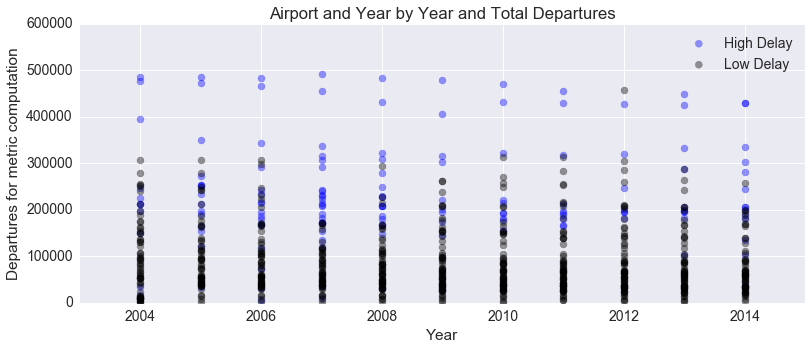

In [1127]:
#doesn't seem to be strong correlation between arrivals and delays

plt.figure(figsize=(13,5))
plt.title("Airport and Year by Year and Total Departures")
plt.ylabel("Departures for metric computation")
plt.xlabel("Year")
plt.ylim(0, 600000)
plt.xlim(2003, 2015)

plt.scatter(x = label_1["year"], y = label_1["departures for metric computation"], color="blue", s = 50, alpha = .4, label = "High Delay")
plt.scatter(x = label_0["year"], y = label_0["departures for metric computation"], color="black", alpha=.4, s = 50, label = "Low Delay")
plt.legend()
plt.show()


In [1083]:
faa = label_1["FAA REGION"].value_counts()

In [1089]:
faa.sort_index

<bound method Series.sort_index of AEA    63
ASO    23
AGL    21
ASW    18
AWP    14
ANM     5
ANE     5
AAL     1
Name: FAA REGION, dtype: int64>

In [1088]:
faa_0.sort_index

<bound method Series.sort_index of AWP    163
ASO    153
AGL     73
ASW     70
AEA     69
ANM     39
ANE     39
ACE     33
AAL     10
Name: FAA REGION, dtype: int64>

In [1093]:
faa_0 = label_0["FAA REGION"].value_counts()

merged_faa = pd.concat([faa, faa_0], join = "outer", axis = 1)


In [1094]:
merged_faa

FAA REGION  FAA REGION
AAL         1.0          10
ACE         NaN          33
AEA        63.0          69
AGL        21.0          73
ANE         5.0          39
ANM         5.0          39
ASO        23.0         153
ASW        18.0          70
AWP        14.0         163

In [1099]:
merged_faa.fillna(value = 0, inplace = True)

In [1102]:
merged_faa.columns = ["label1", "label2"]

In [1119]:
merged_faa.sort_values("label1", inplace = True)

In [1120]:
merged_faa

label1  label2
ACE     0.0      33
AAL     1.0      10
ANE     5.0      39
ANM     5.0      39
AWP    14.0     163
ASW    18.0      70
AGL    21.0      73
ASO    23.0     153
AEA    63.0      69

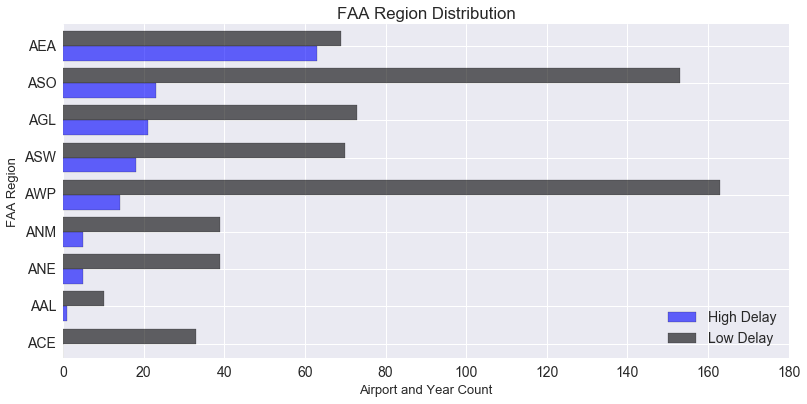

In [1158]:
n_groups = 9

index = np.arange(n_groups)
bar_width = .4
plt.figure(figsize=(13,6))
opacity = .6
rects1 = plt.barh(index, merged_faa["label1"], bar_width, alpha=opacity, color='blue', label='High Delay')
rects2 = plt.barh(index + bar_width, merged_faa["label2"], bar_width, alpha=opacity, color='black', label='Low Delay')
plt.ylabel('FAA Region', size = 13)
plt.xlabel('Airport and Year Count', size = 13)
plt.title('FAA Region Distribution')
plt.yticks(index + bar_width, ('ACE', 'AAL', 'ANE', 'ANM', 'AWP', "ASW", "AGL", "ASO", "AEA"))
plt.legend(loc = 4)
plt.show()

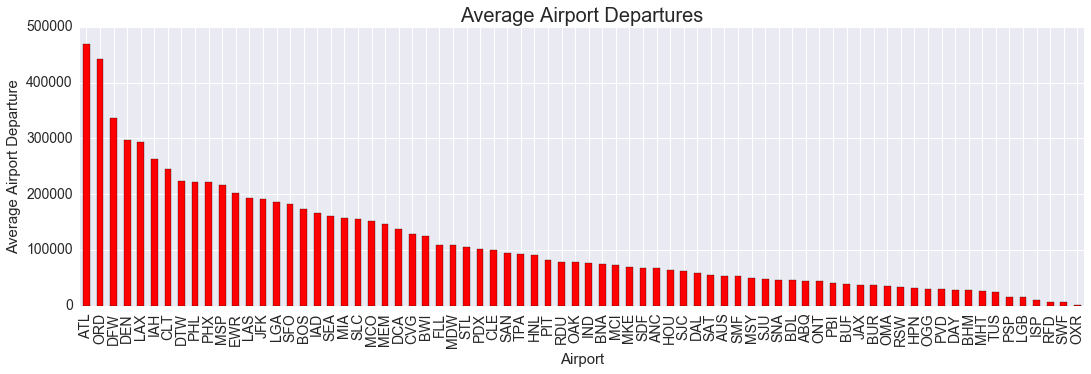

In [1185]:
congested_airports = pd.pivot_table(giant_data, index = ["airport"], values = ["departures for metric computation"],aggfunc=np.mean).sort_values("departures for metric computation", ascending = False)

congested_airports.plot(kind = "bar", figsize = (18,5), color = "red")

ax = plt.gca()
ax.set_title("Average Airport Departures", size = 20)
ax.set_ylabel("Average Airport Departure", size = 15)
ax.set_xlabel("Airport", size=15)
ax.legend_.remove()
plt.show()


What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied